In [ ]:
from google.colab import drive
drive. mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import needed libraries
import pandas as pd
import json
import matplotlib. pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [ ]:
with open('/content/drive/MyDrive/Level Data Datasets/Final_data_sets/grade0_features_labels.csv') as b_scores_data:
  b_scores_grade0 = pd.read_csv(b_scores_data)
with open('/content/drive/MyDrive/Level Data Datasets/Final_data_sets/grade1_features_labels.csv') as b_scores_data:
  b_scores_grade1 = pd.read_csv(b_scores_data)
with open('/content/drive/MyDrive/Level Data Datasets/Final_data_sets/grade2_features_labels.csv') as b_scores_data:
  b_scores_grade2 = pd.read_csv(b_scores_data)
with open('/content/drive/MyDrive/Level Data Datasets/Final_data_sets/grade3_features_labels.csv') as b_scores_data:
  b_scores_grade3 = pd.read_csv(b_scores_data)
with open('/content/drive/MyDrive/Level Data Datasets/Final_data_sets/grade4_features_labels.csv') as b_scores_data:
  b_scores_grade4 = pd.read_csv(b_scores_data)
with open('/content/drive/MyDrive/Level Data Datasets/Final_data_sets/grade5_features_labels.csv') as b_scores_data:
  b_scores_grade5 = pd.read_csv(b_scores_data)


with open('/content/drive/MyDrive/Level Data Datasets/Final_data_sets/grade6_features_labels.csv') as b_scores_data:
  b_scores_grade6 = pd.read_csv(b_scores_data)
with open('/content/drive/MyDrive/Level Data Datasets/Final_data_sets/grade7_features_labels.csv') as b_scores_data:
  b_scores_grade7 = pd.read_csv(b_scores_data)
with open('/content/drive/MyDrive/Level Data Datasets/Final_data_sets/grade8_features_labels.csv') as b_scores_data:
  b_scores_grade8 = pd.read_csv(b_scores_data)


with open('/content/drive/MyDrive/Level Data Datasets/Final_data_sets/grade9_features_labels.csv') as b_scores_data:
  b_scores_grade9 = pd.read_csv(b_scores_data)
with open('/content/drive/MyDrive/Level Data Datasets/Final_data_sets/grade10_features_labels.csv') as b_scores_data:
  b_scores_grade10 = pd.read_csv(b_scores_data)
with open('/content/drive/MyDrive/Level Data Datasets/Final_data_sets/grade11_features_labels.csv') as b_scores_data:
  b_scores_grade11 = pd.read_csv(b_scores_data)
with open('/content/drive/MyDrive/Level Data Datasets/Final_data_sets/grade12_features_labels.csv') as b_scores_data:
  b_scores_grade12 = pd.read_csv(b_scores_data)


## Quick Data Inspection##


In [ ]:
b_scores_grade10 #let's take a look here and verify everything is kosher

,studentId,user_IXL SS,user_IXL Science,user_IXL Math,user_IXL Reading,user_AR,subgroup_ell,user_Reflex M,subgroup_specialEd,subgroup_gender,studentLevel,measurementTypeId,ela_binary_label,ela_multiclass_label,math_binary_label,math_multiclass_label,science_binary_label,science_multiclass_label,history_binary_label,history_multiclass_label
0,1480135,0,0,0,0,0,0.0,0,0.0,0.0,10.0,1,negative,"[-2, -1)",negative,"[-2, -1)",negative,"[-1, 0)",negative,"[-2, -1)"
1,1480184,0,0,2,2,0,0.0,0,0.0,0.0,10.0,1,negative,"(-inf, -2)",negative,"(-inf, -2)",negative,"[-2, -1)",negative,"[-2, -1)"
2,1480209,0,0,0,0,0,0.0,0,0.0,0.0,10.0,2,negative,"(-inf, -2)",negative,"[-1, 0)",negative,"[-2, -1)",negative,"[-2, -1)"
3,1480235,0,0,2,2,0,0.0,0,0.0,0.0,10.0,1,negative,"[-2, -1)",negative,"[-1, 0)",negative,"[-1, 0)",positive,"[0, 1)"
4,1480248,0,0,2,2,0,0.0,0,0.0,0.0,10.0,4,negative,"[-2, -1)",negative,"[-2, -1)",negative,"[-2, -1)",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,2513381,0,0,0,0,0,0.0,0,0.0,0.0,10.0,7,NaN,NaN,positive,"[0, 1)",negative,"[-1, 0)",positive,"[0, 1)"
931,2513421,0,0,0,0,0,0.0,0,0.0,0.0,10.0,3,NaN,NaN,negative,"[-2, -1)",positive,"[0, 1)",negative,"[-2, -1)"
932,2513428,0,0,0,0,0,0.0,0,0.0,0.0,10.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
933,2513436,0,0,0,0,0,0.0,0,0.0,0.0,10.0,7,NaN,NaN,NaN,NaN,negative,"(-inf, -2)",NaN,NaN


In [ ]:
b_scores_grade9['subgroup_gender'].value_counts()

,count
subgroup_gender,
0.0,986
1.0,2
2.0,1


In [ ]:
elementary_scores = pd.concat([b_scores_grade0, b_scores_grade1, b_scores_grade2, b_scores_grade3, b_scores_grade4, b_scores_grade5])
elementary_scores

,studentId,user_IXL SS,user_IXL Science,user_IXL Math,user_IXL Reading,user_AR,subgroup_ell,user_Reflex M,subgroup_specialEd,subgroup_gender,studentLevel,measurementTypeId,ela_binary_label,ela_multiclass_label,math_binary_label,math_multiclass_label,science_binary_label,science_multiclass_label,history_binary_label,history_multiclass_label
0,1487367,0,0,2,2,0,0.0,0,0.0,0.0,0.0,4,negative,"[-1, 0)",NaN,NaN,NaN,NaN,NaN,NaN
1,1487368,0,0,2,2,0,0.0,0,0.0,0.0,0.0,6,positive,"[0, 1)",NaN,NaN,NaN,NaN,NaN,NaN
2,1487378,0,0,2,2,0,0.0,0,0.0,0.0,0.0,4,negative,"[-1, 0)",NaN,NaN,NaN,NaN,NaN,NaN
3,1487381,0,0,2,1,0,0.0,0,0.0,0.0,0.0,4,negative,"[-1, 0)",NaN,NaN,NaN,NaN,NaN,NaN
4,1487384,0,0,2,2,0,0.0,0,0.0,0.0,0.0,40,positive,"[0, 1)",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,2513548,0,0,0,0,0,2.0,0,3.0,1.0,5.0,11,positive,"[1, 2)",positive,"[0, 1)",positive,"[1, 2)",positive,"[0, 1)"
856,2513549,0,0,0,0,0,2.0,0,3.0,2.0,5.0,12,positive,"[1, 2)",positive,"[0, 1)",positive,"[0, 1)",positive,"[1, 2)"
857,2513575,0,0,0,0,0,2.0,0,3.0,1.0,5.0,17,negative,"[-2, -1)",negative,"[-2, -1)",positive,"[0, 1)",negative,"[-2, -1)"
858,2513576,0,0,0,0,0,2.0,0,3.0,1.0,5.0,11,positive,"[0, 1)",positive,"[0, 1)",positive,"[0, 1)",positive,"[0, 1)"


In [ ]:
print(elementary_scores['math_multiclass_label'].unique())
print(elementary_scores['ela_multiclass_label'].unique())
print(elementary_scores['science_multiclass_label'].unique())
print(elementary_scores['history_multiclass_label'].unique())


[nan '[-2, -1)' '[0, 1)' '[-1, 0)' '[1, 2)' '[2, inf)' '(-inf, -2)']
['[-1, 0)' '[0, 1)' '[-2, -1)' '(-inf, -2)' '[1, 2)' nan '[2, inf)']
[nan '[-1, 0)' '[1, 2)' '[-2, -1)' '[0, 1)' '(-inf, -2)' '[2, inf)']
[nan '[-1, 0)' '[1, 2)' '[0, 1)' '[2, inf)' '(-inf, -2)' '[-2, -1)']


In [ ]:
elementary_scores.columns

Index(['studentId', 'user_IXL SS', 'user_IXL Science', 'user_IXL Math',
       'user_IXL Reading', 'user_AR', 'subgroup_ell', 'user_Reflex M',
       'subgroup_specialEd', 'subgroup_gender', 'studentLevel',
       'measurementTypeId', 'ela_binary_label', 'ela_multiclass_label',
       'math_binary_label', 'math_multiclass_label', 'science_binary_label',
       'science_multiclass_label', 'history_binary_label',
       'history_multiclass_label'],
      dtype='object')

In [ ]:
elementary_scores.shape

(5172, 20)

## Define Vocabulary and Functions

In [ ]:
general_x_columns = [col for col in b_scores_grade1.columns if col.startswith('subgroup_')]

history_x_columns = general_x_columns + ['user_IXL SS']
math_x_columns = general_x_columns +['user_IXL Math', 'user_Reflex M']
ela_x_columns = general_x_columns + ['user_IXL Reading', 'user_AR']
science_x_columns = general_x_columns + ['user_IXL Science']

binary_math_label = 'math_binary_label'
multiclass_math_label = 'math_multiclass_label'
binary_ela_label = 'ela_binary_label'
multiclass_ela_label = 'ela_multiclass_label'
binary_history_label = 'history_binary_label'
multiclass_history_label = 'history_multiclass_label'
binary_science_label = 'science_binary_label'
multiclass_science_label = 'science_multiclass_label'


In [ ]:
# Define a function to train and test a Decision Tree classifier
def train_test_DT(X_train, X_test, y_train, y_test, depth, crit='entropy'):
    """
    Train and test a Decision Tree Classifier.

    Parameters:
    X_train, X_test, y_train, y_test: Split datasets for training and testing
    depth: Maximum depth of the decision tree
    crit: Criterion for split ('entropy' or 'gini') #KAELAN NOTE: RESEARCH WTF THIS IS

    Returns:
    acc_score: Accuracy of the model on the test set
    """
    model = DecisionTreeClassifier(criterion=crit, max_depth=depth)
    model.fit(X_train, y_train)  # Train the model
    class_label_predictions = model.predict(X_test)  # Predict on the test set
    acc_score = accuracy_score(y_test, class_label_predictions)  # Compute accuracy
    return acc_score,class_label_predictions



In [ ]:
def train_best_DT(X_train, X_test, y_train, y_test, depths=[3,5,8,16,32]):

  max_depth_range = depths
  accuracy_list = []
  best_acc = 0

  for md in max_depth_range:
      score, predictions = train_test_DT(X_train, X_test, y_train, y_test, md)
      accuracy_list.append(score)

      if score > best_acc:
        best_acc = score
        best_depth = md
  print(f"The depth associated with the highest accuracy ({best_acc:.4f}) is: {best_depth}")
  return best_depth, accuracy_list

In [ ]:
# Visualization function
def visualize_accuracy(hyperparam_range, acc_scores):
    """
    Visualize the accuracy of models for different hyperparameter values.

    Parameters:
    hyperparam_range: List of hyperparameter values (e.g., depths)
    acc_scores: Corresponding accuracy scores for the hyperparameter values
    """
    plt.figure(figsize=(8, 5))
    sns.lineplot(x=hyperparam_range, y=acc_scores, marker='o')
    plt.title('Model Accuracy for Different Max Depths', fontsize=14)
    plt.xlabel('Max Depth', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.grid(True)
    plt.show()

In [ ]:
# # Visualize results
# visualize_accuracy(max_depth_range, accuracy_list)

In [ ]:
def train_test_LR(X_train, y_train, X_test, y_test, c=1.01, max_iter3=100):
    """
    Fits a Logistic Regression classifier to the training data X_train, y_train.
    Returns the log loss and accuracy of resulting predictions on the test set.

    Parameters:
    - X_train, y_train, X_test, y_test: make sure input in the correct order
    - c: Hyperparameter that controls how much regularization is applied to the model.
    - max_iter3: Logistic Regression hyperparameter. Both hyperparameters should be tested on varied values

    Returns:
    - l_loss: Log loss of the model on the test set.
    - acc_score: Accuracy of the model on the test set.
    - class_label_predictions: Predictions on the test set.
    """
    model = LogisticRegression(C=c, max_iter=max_iter3)
    model.fit(X_train, y_train)
    probability_predictions = model.predict_proba(X_test)
    # Compute the log loss on 'probability_predictions' and save the result to 'l_loss'
    # the below does not work, but we're not using log_loss in this iteration, leave this as a TODO for next iteration
    # l_loss = log_loss(y_test, probability_predictions)
    l_loss = 0
    class_label_predictions = model.predict(X_test)
    acc_score = accuracy_score(y_test, class_label_predictions)

    return l_loss, acc_score, class_label_predictions

In [ ]:
cs = [10**i for i in range(-10,10)]
cs

[1e-10,
 1e-09,
 1e-08,
 1e-07,
 1e-06,
 1e-05,
 0.0001,
 0.001,
 0.01,
 0.1,
 1,
 10,
 100,
 1000,
 10000,
 100000,
 1000000,
 10000000,
 100000000,
 1000000000]

In [ ]:
def train_best_ld(X_train, y_train, X_test, y_test, cs, max_iter2=100):
  ll_cs = []
  acc_cs = []
  best_acc = 0

  for c in cs:
      ll, acc,predictions = train_test_LR(X_train, y_train, X_val, y_val, c, max_iter3= max_iter2)
      #print('c of {0}:\nlog loss of {1}\naccuracy score of {2}'.format(c, ll,acc))
      ll_cs.append(ll)
      acc_cs.append(acc)

      if acc > best_acc:
        best_acc = acc
        best_c = c

  print(f"The C value associated with the highest accuracy ({best_acc:.4f}) is: {best_c}")
  return best_c, ll_cs, acc_cs


In [ ]:
middle_scores = pd.concat([b_scores_grade6, b_scores_grade7, b_scores_grade8])
middle_scores.head()

,studentId,user_IXL SS,user_IXL Science,user_IXL Math,user_IXL Reading,user_AR,subgroup_ell,user_Reflex M,subgroup_specialEd,subgroup_gender,studentLevel,measurementTypeId,ela_binary_label,ela_multiclass_label,math_binary_label,math_multiclass_label,science_binary_label,science_multiclass_label,history_binary_label,history_multiclass_label
0,1482411,0,0,1,1,0,2.0,0,3.0,2.0,6.0,8,negative,"[-1, 0)",negative,"[-1, 0)",negative,"[-1, 0)",positive,"[1, 2)"
1,1482412,0,2,0,0,0,2.0,0,3.0,2.0,6.0,10,positive,"[0, 1)",negative,"[-1, 0)",negative,"[-1, 0)",positive,"[0, 1)"
2,1482413,0,2,0,1,0,2.0,0,3.0,1.0,6.0,17,positive,"[0, 1)",positive,"[0, 1)",positive,"[0, 1)",positive,"[0, 1)"
3,1482427,0,0,1,1,0,2.0,0,3.0,1.0,6.0,17,positive,"[0, 1)",positive,"[0, 1)",positive,"[0, 1)",positive,"[1, 2)"
4,1482428,0,1,0,2,0,2.0,0,1.0,2.0,6.0,10,negative,"[-1, 0)",negative,"[-2, -1)",negative,"[-1, 0)",positive,"[1, 2)"


In [ ]:
middle_scores.shape

(2854, 20)

In [ ]:
highschool_scores = pd.concat([b_scores_grade9, b_scores_grade10, b_scores_grade11, b_scores_grade12])
highschool_scores.head()

,studentId,user_IXL SS,user_IXL Science,user_IXL Math,user_IXL Reading,user_AR,subgroup_ell,user_Reflex M,subgroup_specialEd,subgroup_gender,studentLevel,measurementTypeId,ela_binary_label,ela_multiclass_label,math_binary_label,math_multiclass_label,science_binary_label,science_multiclass_label,history_binary_label,history_multiclass_label
0,1480382,0,0,2,0,0,0.0,0,0.0,0.0,9.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1480529,0,0,2,2,0,0.0,0,0.0,0.0,9.0,4,negative,"[-1, 0)",negative,"[-1, 0)",negative,"[-1, 0)",NaN,NaN
2,1480686,0,0,2,1,0,0.0,0,0.0,0.0,9.0,7,positive,"[0, 1)",positive,"[0, 1)",positive,"[0, 1)",positive,"[2, inf)"
3,1480814,0,0,2,2,0,0.0,0,0.0,0.0,9.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1480994,0,0,0,0,0,0.0,0,0.0,0.0,9.0,9,negative,"[-2, -1)",negative,"[-2, -1)",negative,"[-2, -1)",NaN,NaN


In [ ]:
print(b_scores_grade9['subgroup_gender'].unique())
print(b_scores_grade10['subgroup_gender'].unique())
print(b_scores_grade11['subgroup_gender'].unique())
print(b_scores_grade12['subgroup_gender'].unique())

[0. 1. 2.]
[0.]
[0.]
[0.]


In [ ]:
b_scores_grade9['subgroup_gender'].value_counts()

,count
subgroup_gender,
0.0,986
1.0,2
2.0,1


**Gender is depricated for every grade level here, we will only make a coed set of models for highschool.**

In [ ]:
highschool_scores.shape

(3444, 20)

#Elementary school

##Coed

###Math

In [ ]:
elementary_scores

,studentId,user_IXL SS,user_IXL Science,user_IXL Math,user_IXL Reading,user_AR,subgroup_ell,user_Reflex M,subgroup_specialEd,subgroup_gender,studentLevel,measurementTypeId,ela_binary_label,ela_multiclass_label,math_binary_label,math_multiclass_label,science_binary_label,science_multiclass_label,history_binary_label,history_multiclass_label
0,1487367,0,0,2,2,0,0.0,0,0.0,0.0,0.0,4,negative,"[-1, 0)",NaN,NaN,NaN,NaN,NaN,NaN
1,1487368,0,0,2,2,0,0.0,0,0.0,0.0,0.0,6,positive,"[0, 1)",NaN,NaN,NaN,NaN,NaN,NaN
2,1487378,0,0,2,2,0,0.0,0,0.0,0.0,0.0,4,negative,"[-1, 0)",NaN,NaN,NaN,NaN,NaN,NaN
3,1487381,0,0,2,1,0,0.0,0,0.0,0.0,0.0,4,negative,"[-1, 0)",NaN,NaN,NaN,NaN,NaN,NaN
4,1487384,0,0,2,2,0,0.0,0,0.0,0.0,0.0,40,positive,"[0, 1)",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,2513548,0,0,0,0,0,2.0,0,3.0,1.0,5.0,11,positive,"[1, 2)",positive,"[0, 1)",positive,"[1, 2)",positive,"[0, 1)"
856,2513549,0,0,0,0,0,2.0,0,3.0,2.0,5.0,12,positive,"[1, 2)",positive,"[0, 1)",positive,"[0, 1)",positive,"[1, 2)"
857,2513575,0,0,0,0,0,2.0,0,3.0,1.0,5.0,17,negative,"[-2, -1)",negative,"[-2, -1)",positive,"[0, 1)",negative,"[-2, -1)"
858,2513576,0,0,0,0,0,2.0,0,3.0,1.0,5.0,11,positive,"[0, 1)",positive,"[0, 1)",positive,"[0, 1)",positive,"[0, 1)"


In [ ]:
elementary_scores['math_multiclass_label'].value_counts()

,count
math_multiclass_label,
"[0, 1)",1567
"[-1, 0)",1489
"[-2, -1)",683
"[1, 2)",375
"(-inf, -2)",120
"[2, inf)",15


In [ ]:
print(elementary_scores['subgroup_gender'].unique())
print(elementary_scores['subgroup_specialEd'].unique())
print(elementary_scores['subgroup_ell'].unique())
print(elementary_scores['user_IXL SS'].unique())
print(elementary_scores['user_IXL Science'].unique())
print(elementary_scores['user_IXL SS'].unique())

[0. 1. 2.]
[0. 1. 3.]
[0. 2. 1.]
[0 1 2]
[0 1 2]
[0 1 2]


IXL SS AND SCIENCE ARE EMPTY FOR FIRST GRADERS. ADDITIONALLY, GENDER DATA IS DEPRICATED FOR FIRST GRADERS


In [ ]:
math_x_columns

['subgroup_ell',
 'subgroup_specialEd',
 'subgroup_gender',
 'user_IXL Math',
 'user_Reflex M']

In [ ]:
# Split the data into training, validation, and test sets
X = elementary_scores[math_x_columns]
y = elementary_scores[binary_math_label]


In [ ]:
# Drop rows where 'y' is NaN
X = X[~y.isna()]
y = y[~y.isna()]

#Verify the change
print("X shape:", X.shape)
print("y shape:", y.shape)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X shape: (4249, 5)
y shape: (4249,)
X_train shape: (2974, 5)
y_train shape: (2974,)
X_val shape: (637, 5)
y_val shape: (637,)
X_test shape: (638, 5)
y_test shape: (638,)


In [ ]:
best_c,ll_cs,acc_cs = train_best_ld(X_train, y_train, X_val, y_val, cs)

elementary_math_binary_LR = LogisticRegression(C=best_c)
elementary_math_binary_LR.fit(X_train, y_train)

The C value associated with the highest accuracy (0.6075) is: 0.01


LogisticRegression(C=0.01)

In [ ]:
val_accuracy = elementary_math_binary_LR.score(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy}")

test_accuracy = elementary_math_binary_LR.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

Validation Accuracy: 0.6075353218210361
Test Accuracy: 0.603448275862069


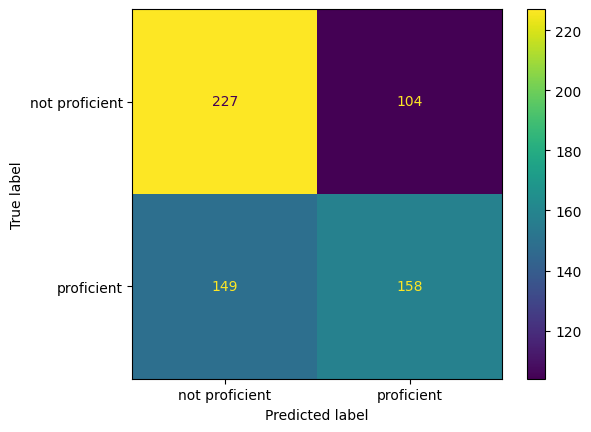

In [ ]:
class_label_predictions = elementary_math_binary_LR.predict(X_test)
cm = confusion_matrix(y_test, class_label_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["not proficient", "proficient"])
disp.plot()
plt.show()

In [ ]:
elementary_math_binary_LR.coef_

array([[-0.29695416,  0.37070262, -0.36239214, -0.13978343,  0.33724189]])

In [ ]:
X

,subgroup_ell,subgroup_specialEd,subgroup_gender,user_IXL Math,user_Reflex M
157,0.0,0.0,0.0,0,0
629,0.0,0.0,0.0,2,0
0,0.0,0.0,0.0,2,0
1,0.0,0.0,0.0,0,0
2,0.0,0.0,0.0,1,1
...,...,...,...,...,...
855,2.0,3.0,1.0,0,0
856,2.0,3.0,2.0,0,0
857,2.0,3.0,1.0,0,0
858,2.0,3.0,1.0,0,0


In [ ]:
best_depth, acc_cs = train_best_DT(X_train, X_val, y_train, y_val)

elementary_math_binary_DT = DecisionTreeClassifier(criterion='entropy', max_depth=best_depth)
elementary_math_binary_DT.fit(X_train, y_train)

The depth associated with the highest accuracy (0.6311) is: 8


DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [ ]:
val_accuracy = elementary_math_binary_DT.score(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy}")

test_accuracy = elementary_math_binary_DT.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

Validation Accuracy: 0.631083202511774
Test Accuracy: 0.6363636363636364


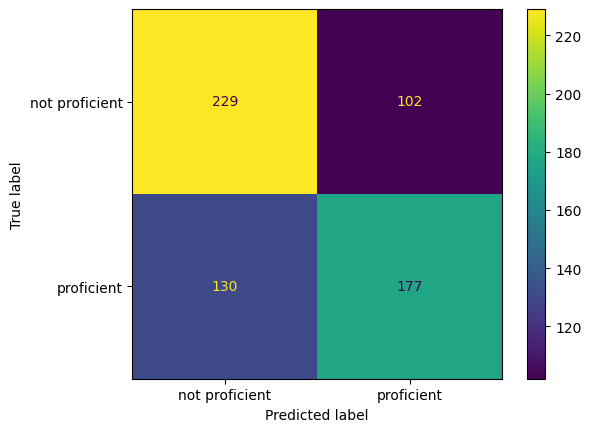

In [ ]:
class_label_predictions = elementary_math_binary_DT.predict(X_test)
cm = confusion_matrix(y_test, class_label_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["not proficient", "proficient"])
disp.plot()
plt.show()

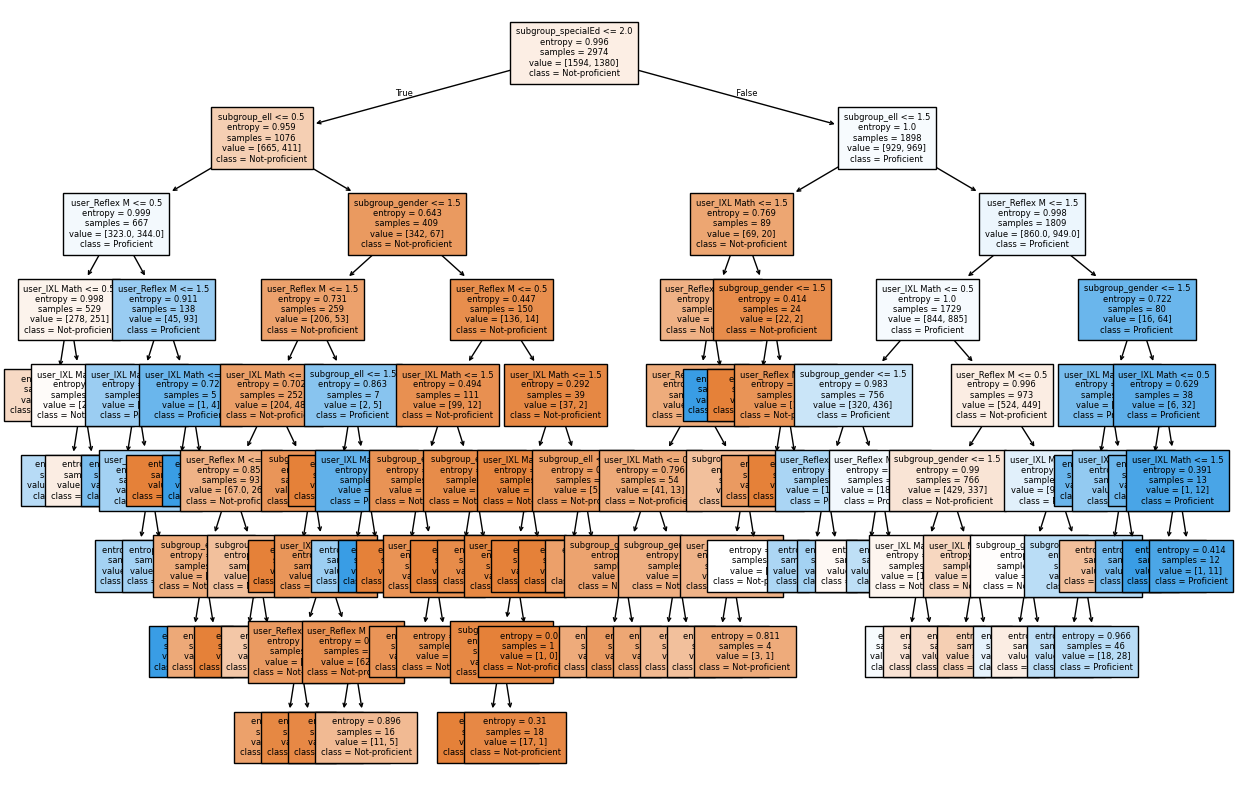

In [ ]:
fig = plt.figure(figsize=(15, 10))
_ = tree.plot_tree(
    elementary_math_binary_DT,
    feature_names=X.columns,
    class_names=['Not-proficient', 'Proficient'],
    filled=True,
    fontsize=6,

)
plt.show()

In [ ]:
def calculate_entropy(tree, node):
    if tree.n_node_samples[node] == 0:
        return 0
    probabilities = tree.value[node][0] / tree.n_node_samples[node]
    return -np.sum(probabilities * np.log2(probabilities + 1e-9))

entropy_values = [calculate_entropy(elementary_math_binary_DT.tree_, i) for i in range(elementary_math_binary_DT.tree_.node_count)]

In [ ]:
entropy_values

[0.004214674554430759,
 0.010251748081657172,
 0.015563457071357409,
 0.01898911610989041,
 0.06615323728970368,
 0.023608108362114112,
 0.0867416701749899,
 0.028738530529997763,
 0.058111611864814755,
 0.05993271582495384,
 0.22484335649712206,
 0.07065153249089856,
 0.15639990087118139,
 0.10203820036670933,
 0.6087712350695549,
 -1.4426951595367387e-09,
 0.4999999985573049,
 0.02278560526553598,
 0.03377569813770318,
 0.03444343550663612,
 0.07950561978009235,
 0.10785376237843997,
 -1.4426951595367387e-09,
 0.10891032685576411,
 0.19417287810337694,
 0.499999998557305,
 0.205272885712047,
 0.049640394599077965,
 0.4643856175347774,
 0.05102895373329413,
 0.08383737621493315,
 0.1051270945813142,
 0.23041624971477617,
 0.0948855993856939,
 0.11230427362042164,
 0.3060023866480198,
 0.5243536386323577,
 -1.4426951595367387e-09,
 0.5391641508428617,
 0.8344194420398252,
 0.5283208321310237,
 0.051175450084829495,
 0.06566304937767285,
 0.09217208579607065,
 -1.4426951595367387e-09,
 

In [ ]:
elementary_math_binary_DT.feature_importances_

array([0.45433097, 0.11327711, 0.07036333, 0.15630196, 0.20572662])

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# ... (Your existing code for data loading and preprocessing) ...

# Assuming 'elementary_math_binary_DT' is your trained DecisionTreeClassifier
# and 'X' contains the feature names

def calculate_entropy(tree, node):
    if tree.n_node_samples[node] == 0:
        return 0
    probabilities = tree.value[node][0] / tree.n_node_samples[node]
    return -np.sum(probabilities * np.log2(probabilities + 1e-9))

entropy_values = [calculate_entropy(elementary_math_binary_DT.tree_, i) for i in range(elementary_math_binary_DT.tree_.node_count)]

for node_id in range(elementary_math_binary_DT.tree_.node_count):

    feature_index = elementary_math_binary_DT.tree_.feature[node_id]
    if feature_index != -2:  # -2 indicates a leaf node
        print(f"Node {node_id}:")
        feature_name = X.columns[feature_index]
        print(f"    Feature: {feature_name}")
    else:
        continue
        print(f"Node {node_id}:")
        print("    Feature: Leaf Node")

    print(f"    Entropy: {entropy_values[node_id]}")
    print("-" * 40)

Node 0:
    Feature: subgroup_specialEd
    Entropy: 0.004214674554430759
----------------------------------------
Node 1:
    Feature: subgroup_ell
    Entropy: 0.010251748081657172
----------------------------------------
Node 2:
    Feature: user_Reflex M
    Entropy: 0.015563457071357409
----------------------------------------
Node 3:
    Feature: user_IXL Math
    Entropy: 0.01898911610989041
----------------------------------------
Node 5:
    Feature: user_IXL Math
    Entropy: 0.023608108362114112
----------------------------------------
Node 8:
    Feature: user_Reflex M
    Entropy: 0.058111611864814755
----------------------------------------
Node 9:
    Feature: user_IXL Math
    Entropy: 0.05993271582495384
----------------------------------------
Node 11:
    Feature: user_IXL Math
    Entropy: 0.07065153249089856
----------------------------------------
Node 14:
    Feature: user_IXL Math
    Entropy: 0.6087712350695549
----------------------------------------
Node 17:


In [ ]:
node_df['Feature'].value_counts()

,count
Feature,
Leaf Node,60
user_IXL Math,23
user_Reflex M,15
subgroup_gender,10
subgroup_ell,9
subgroup_specialEd,2


In [ ]:
node_df[node_df['Feature'] == 'subgroup_gender']['Entropy']

,Entropy
17,0.022786
67,0.198463
70,0.213108
73,0.454247
79,0.208282
86,0.013949
94,0.013800
102,0.065445
105,0.085982
108,0.088048


In [ ]:
X = elementary_scores[math_x_columns]
y = elementary_scores[multiclass_math_label]

In [ ]:
# Drop rows where 'y' is NaN
X = X[~y.isna()]
y = y[~y.isna()]

#Verify the change
print("X shape:", X.shape)
print("y shape:", y.shape)

#You can now re-split your data if needed
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X shape: (4249, 5)
y shape: (4249,)
X_train shape: (2974, 5)
y_train shape: (2974,)
X_val shape: (637, 5)
y_val shape: (637,)
X_test shape: (638, 5)
y_test shape: (638,)


In [ ]:
best_c,ll_cs,acc_cs = train_best_ld(X_train, y_train, X_val, y_val, cs, max_iter2=900)

elementary_math_multiclass_LR = LogisticRegression(C=best_c)
elementary_math_multiclass_LR.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

The C value associated with the highest accuracy (0.4223) is: 1


LogisticRegression(C=1)

In [ ]:
elementary_math_multiclass_LR.coef_

array([[ 0.57488439, -1.03092513,  0.53280055,  0.22302115, -0.63944409],
       [ 0.08162461,  0.38627512,  0.16468856,  0.09680385, -0.05760369],
       [ 0.55319139, -0.29397925,  0.68297795,  0.24940903, -0.46294921],
       [-0.30687471,  0.71155861, -0.11922272, -0.02386761,  0.24646471],
       [-0.27050308,  0.91702255, -0.81508002, -0.05390882,  0.74994144],
       [-0.6323226 , -0.6899519 , -0.44616433, -0.4914576 ,  0.16359085]])

In [ ]:
val_accuracy = elementary_math_multiclass_LR.score(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy}")

test_accuracy = elementary_math_multiclass_LR.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

Validation Accuracy: 0.42229199372056514
Test Accuracy: 0.4498432601880878


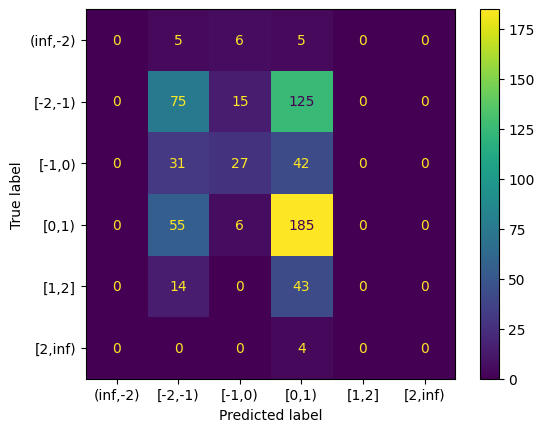

In [ ]:
class_label_predictions = elementary_math_multiclass_LR.predict(X_test)
cm = confusion_matrix(y_test, class_label_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["(inf,-2)", "[-2,-1)","[-1,0)","[0,1)", "[1,2]", "[2,inf)"])
disp.plot()
plt.show()

In [ ]:
best_depth, acc_cs = train_best_DT(X_train, X_val, y_train, y_val)

elementary_math_multiclass_DT = DecisionTreeClassifier(criterion='entropy', max_depth=best_depth)
elementary_math_multiclass_DT.fit(X_train, y_train)

The depth associated with the highest accuracy (0.4364) is: 5


DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [ ]:
val_accuracy = elementary_math_multiclass_DT.score(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy}")

test_accuracy = elementary_math_multiclass_DT.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

Validation Accuracy: 0.4364207221350079
Test Accuracy: 0.44043887147335425


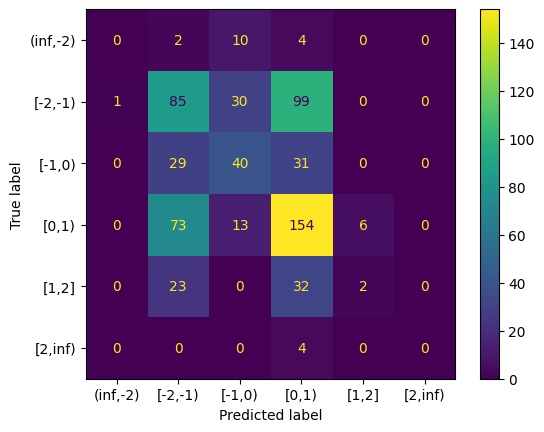

In [ ]:
class_label_predictions = elementary_math_multiclass_DT.predict(X_test)
cm = confusion_matrix(y_test, class_label_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["(inf,-2)", "[-2,-1)","[-1,0)","[0,1)", "[1,2]", "[2,inf)"])
disp.plot()
plt.show()

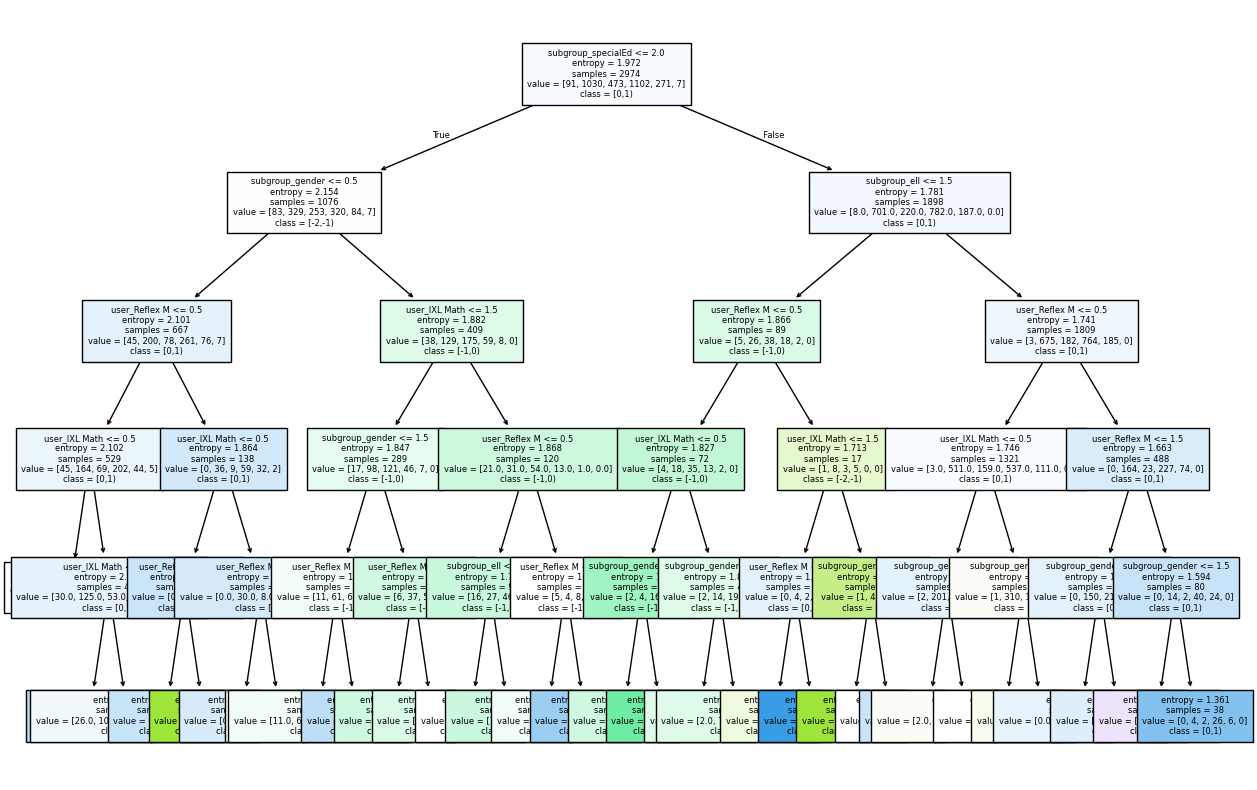

In [ ]:
fig = plt.figure(figsize=(15, 10))
_ = tree.plot_tree(
    elementary_math_multiclass_DT,
    feature_names=X.columns,
    class_names=["(inf,-2)", "[-2,-1)","[-1,0)","[0,1)", "[1,2]", "[2,inf)"],
    filled=True,
    fontsize=6
)
plt.show()

###ELA

In [ ]:
print(ela_x_columns)
print(binary_ela_label)
print(multiclass_ela_label)

['subgroup_ell', 'subgroup_specialEd', 'subgroup_gender', 'user_IXL Reading', 'user_AR']
ela_binary_label
ela_multiclass_label


In [ ]:
X = elementary_scores[ela_x_columns]
y = elementary_scores[binary_ela_label]

In [ ]:
X = X[~y.isna()]
y = y[~y.isna()]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
best_c,ll_cs,acc_cs = train_best_ld(X_train, y_train, X_val, y_val, cs, max_iter2=200)

elementary_ela_binary_LR = LogisticRegression(C=best_c)
elementary_ela_binary_LR.fit(X_train, y_train)

The C value associated with the highest accuracy (0.6037) is: 0.01


LogisticRegression(C=0.01)

In [ ]:
val_accuracy = elementary_ela_binary_LR.score(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy}")

test_accuracy = elementary_ela_binary_LR.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

Validation Accuracy: 0.6036505867014341
Test Accuracy: 0.6492829204693612


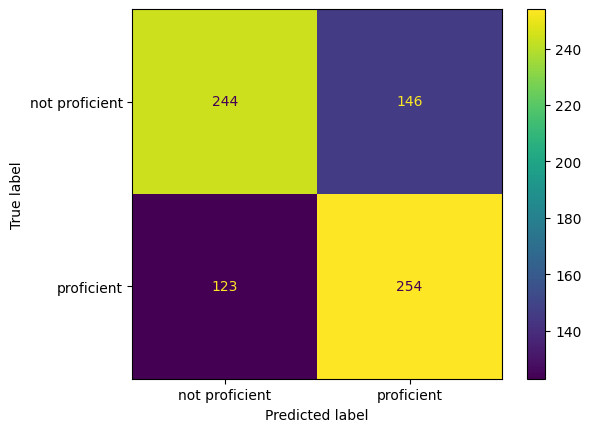

In [ ]:
class_label_predictions = elementary_ela_binary_LR.predict(X_test)
cm = confusion_matrix(y_test, class_label_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["not proficient", "proficient"])
disp.plot()
plt.show()

In [ ]:
best_depth, acc_cs = train_best_DT(X_train, X_val, y_train, y_val)

elementary_ela_binary_DT = DecisionTreeClassifier(criterion='entropy', max_depth=best_depth)
elementary_ela_binary_DT.fit(X_train, y_train)

The depth associated with the highest accuracy (0.6310) is: 3


DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
val_accuracy = elementary_ela_binary_DT.score(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy}")

test_accuracy = elementary_ela_binary_DT.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

Validation Accuracy: 0.6310299869621904
Test Accuracy: 0.6714471968709257


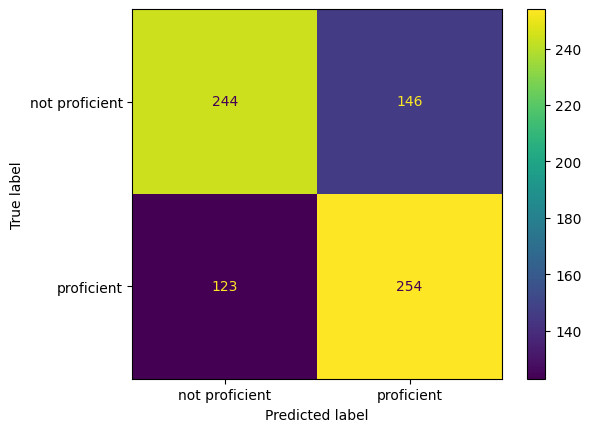

In [ ]:
class_label_predictions = elementary_ela_binary_LR.predict(X_test)
cm = confusion_matrix(y_test, class_label_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["not proficient", "proficient"])
disp.plot()
plt.show()

In [ ]:
X = elementary_scores[ela_x_columns]
y = elementary_scores[multiclass_ela_label]


In [ ]:
X = X[~y.isna()]
y = y[~y.isna()]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
best_c,ll_cs,acc_cs = train_best_ld(X_train, y_train, X_val, y_val, cs, max_iter2=900)

elementary_ela_multiclass_LR = LogisticRegression(C=best_c)
elementary_ela_multiclass_LR.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The C value associated with the highest accuracy (0.5033) is: 1


LogisticRegression(C=1)

In [ ]:
val_accuracy = elementary_ela_multiclass_LR.score(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy}")

test_accuracy = elementary_ela_multiclass_LR.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

Validation Accuracy: 0.5032594524119948
Test Accuracy: 0.5384615384615384


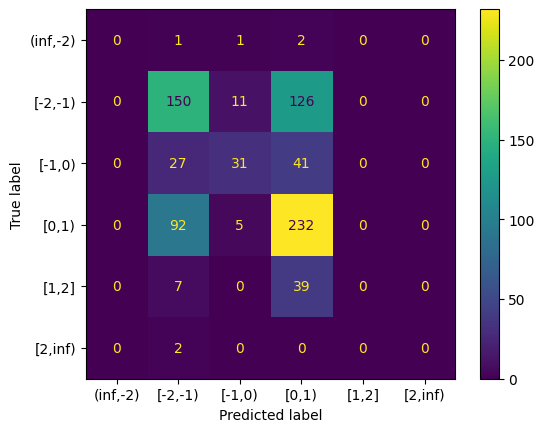

In [ ]:
class_label_predictions = elementary_ela_multiclass_LR.predict(X_test)
cm = confusion_matrix(y_test, class_label_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["(inf,-2)", "[-2,-1)","[-1,0)","[0,1)", "[1,2]", "[2,inf)"])
disp.plot()
plt.show()

In [ ]:
best_depth, acc_cs = train_best_DT(X_train, X_val, y_train, y_val)

elementary_ela_multiclass_DT = DecisionTreeClassifier(criterion='entropy', max_depth=best_depth)
elementary_ela_multiclass_DT.fit(X_train, y_train)

The depth associated with the highest accuracy (0.5124) is: 3


DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
val_accuracy = elementary_ela_multiclass_DT.score(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy}")

test_accuracy = elementary_ela_multiclass_DT.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

Validation Accuracy: 0.5123859191655802
Test Accuracy: 0.546284224250326


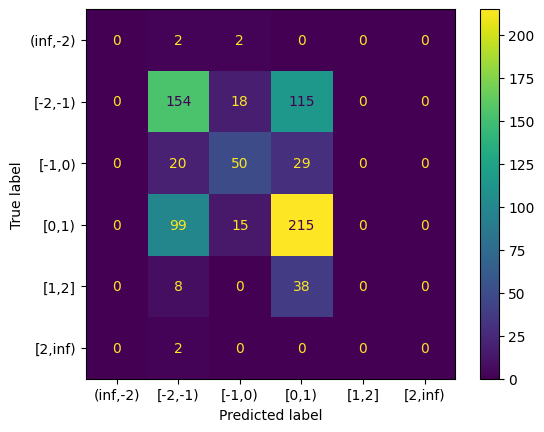

In [ ]:
class_label_predictions = elementary_ela_multiclass_DT.predict(X_test)
cm = confusion_matrix(y_test, class_label_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["(inf,-2)", "[-2,-1)","[-1,0)","[0,1)", "[1,2]", "[2,inf)"])
disp.plot()
plt.show()

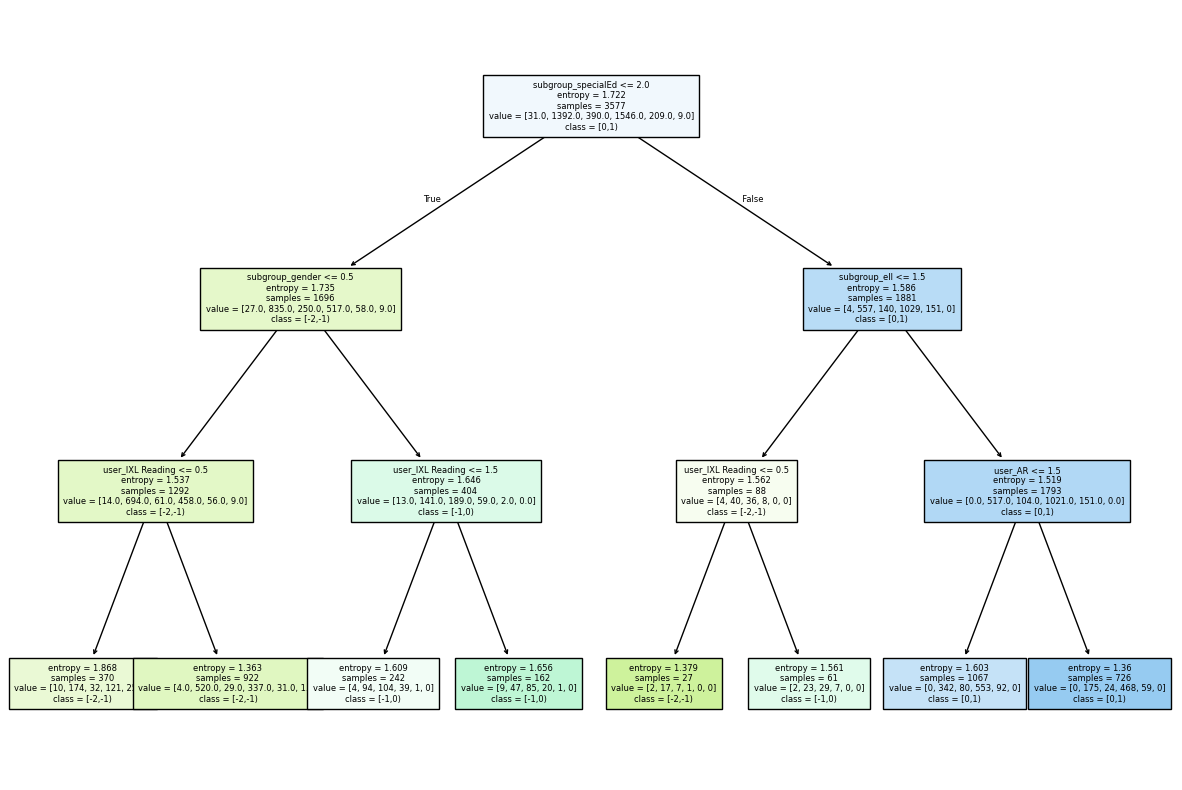

In [ ]:
fig = plt.figure(figsize=(15, 10))
_ = tree.plot_tree(
    elementary_ela_multiclass_DT,
    feature_names=X.columns,
    class_names=["(inf,-2)", "[-2,-1)","[-1,0)","[0,1)", "[1,2]", "[2,inf)"],
    filled=True,
    fontsize=6
)
plt.show()

###History

In [ ]:
print(history_x_columns)
print(binary_history_label)
print(multiclass_history_label)

['subgroup_ell', 'subgroup_specialEd', 'subgroup_gender', 'user_IXL SS']
history_binary_label
history_multiclass_label


In [ ]:
X = elementary_scores[history_x_columns]
y = elementary_scores[binary_history_label]

In [ ]:
# Drop rows where 'y' is NaN
X = X[~y.isna()]
y = y[~y.isna()]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
best_c,ll_cs,acc_cs = train_best_ld(X_train, y_train, X_val, y_val, cs, max_iter2=100)

elementary_history_binary_LR = LogisticRegression(C=best_c)
elementary_history_binary_LR.fit(X_train, y_train)

The C value associated with the highest accuracy (0.7227) is: 0.1


LogisticRegression(C=0.1)

In [ ]:
val_accuracy = elementary_history_binary_LR.score(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy}")

test_accuracy = elementary_history_binary_LR.score(X_val, y_val)
print(f"Validation Accuracy: {test_accuracy}")

Validation Accuracy: 0.7226890756302521
Validation Accuracy: 0.7226890756302521


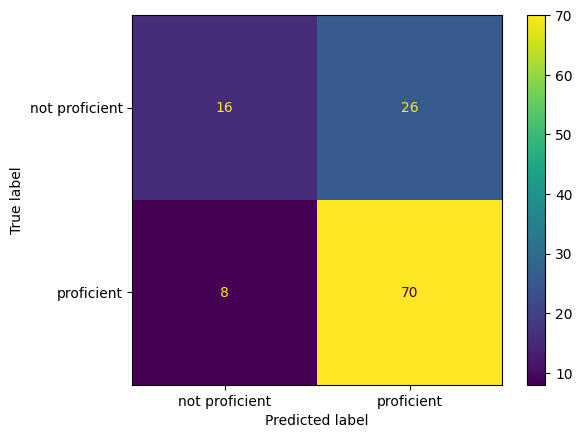

In [ ]:
class_label_predictions = elementary_history_binary_LR.predict(X_test)
cm = confusion_matrix(y_test, class_label_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["not proficient", "proficient"])
disp.plot()
plt.show()

In [ ]:
best_depth, acc_cs = train_best_DT(X_train, X_val, y_train, y_val)

elementary_history_binary_DT = DecisionTreeClassifier(criterion='entropy', max_depth=best_depth)
elementary_history_binary_DT.fit(X_train, y_train)

The depth associated with the highest accuracy (0.7647) is: 5


DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [ ]:
val_accuracy = elementary_history_binary_DT.score(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy}")

test_accuracy = elementary_history_binary_DT.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

Validation Accuracy: 0.7647058823529411
Test Accuracy: 0.7083333333333334


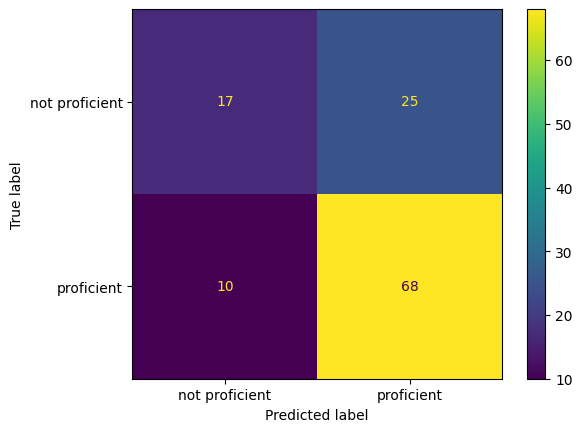

In [ ]:
class_label_predictions = elementary_history_binary_DT.predict(X_test)
cm = confusion_matrix(y_test, class_label_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["not proficient", "proficient"])
disp.plot()
plt.show()

In [ ]:
X = elementary_scores[history_x_columns]
y = elementary_scores[multiclass_history_label]

In [ ]:
# Drop rows where 'y' is NaN
X = X[~y.isna()]
y = y[~y.isna()]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [ ]:
best_c,ll_cs,acc_cs = train_best_ld(X_train, y_train, X_val, y_val, cs, max_iter2=900)

elementary_history_multiclass_LR = LogisticRegression(C=best_c, max_iter=900)
elementary_history_multiclass_LR.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The C value associated with the highest accuracy (0.4622) is: 0.1


LogisticRegression(C=0.1, max_iter=900)

 **Important note here! Scikit-learn itself says that it struggles to fit this data. We had to increase the number of iterations for it to converge on a solution. This may mean that the fit between the x and the y here is especially bad.**

In [ ]:
val_accuracy = elementary_history_multiclass_LR.score(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy}")

test_accuracy = elementary_history_multiclass_LR.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

Validation Accuracy: 0.46218487394957986
Test Accuracy: 0.39166666666666666


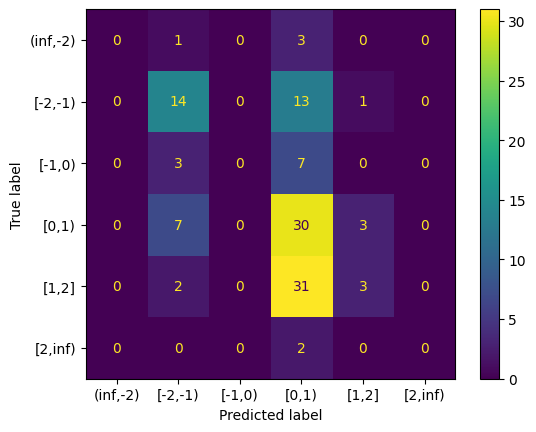

In [ ]:
class_label_predictions = elementary_history_multiclass_LR.predict(X_test)
cm = confusion_matrix(y_test, class_label_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["(inf,-2)", "[-2,-1)","[-1,0)","[0,1)", "[1,2]", "[2,inf)"])
disp.plot()
plt.show()

In [ ]:
best_depth, acc_cs = train_best_DT(X_train, X_val, y_train, y_val)

elementary_history_multiclass_DT = DecisionTreeClassifier(criterion='entropy', max_depth=best_depth)
elementary_history_multiclass_DT.fit(X_train, y_train)

The depth associated with the highest accuracy (0.5210) is: 5


DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [ ]:
val_accuracy = elementary_history_multiclass_DT.score(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy}")

test_accuracy = elementary_history_multiclass_DT.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

Validation Accuracy: 0.5210084033613446
Test Accuracy: 0.4166666666666667


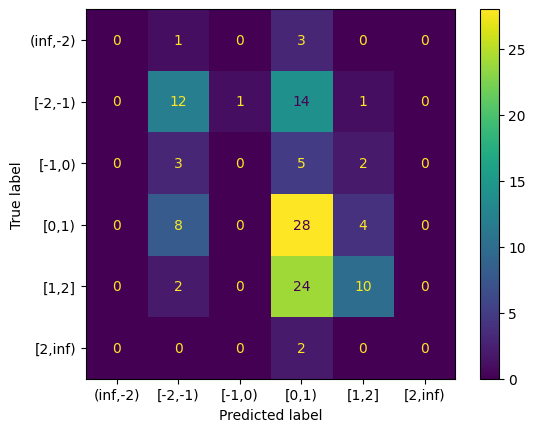

In [ ]:
class_label_predictions = elementary_history_multiclass_DT.predict(X_test)
cm = confusion_matrix(y_test, class_label_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["(inf,-2)", "[-2,-1)","[-1,0)","[0,1)", "[1,2]", "[2,inf)"])
disp.plot()
plt.show()

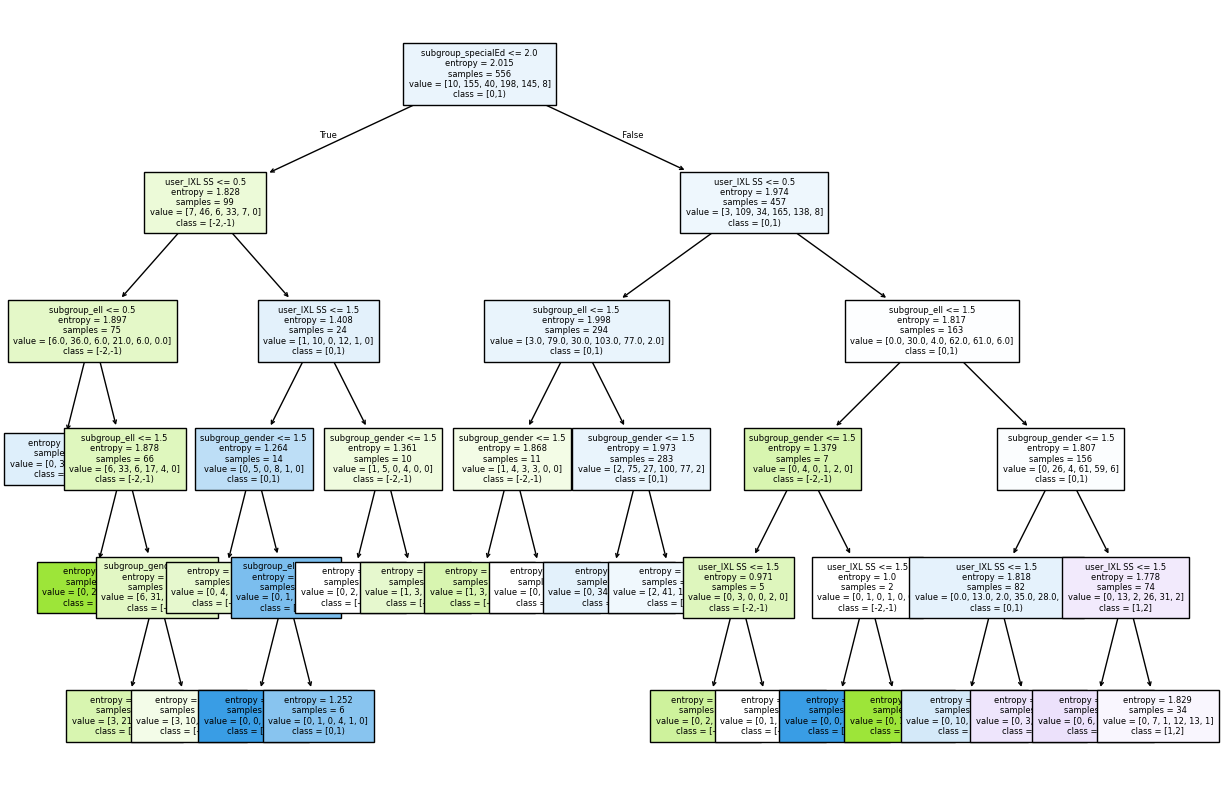

In [ ]:
fig = plt.figure(figsize=(15, 10))
_ = tree.plot_tree(
    elementary_history_multiclass_DT,
    feature_names=X.columns,
    class_names=["(inf,-2)", "[-2,-1)","[-1,0)","[0,1)", "[1,2]", "[2,inf)"],
    filled=True,
    fontsize=6
)
plt.show()

###Science

In [ ]:
print(science_x_columns)
print(binary_science_label)
print(multiclass_science_label)

['subgroup_ell', 'subgroup_specialEd', 'subgroup_gender', 'user_IXL Science']
science_binary_label
science_multiclass_label


In [ ]:
X = elementary_scores[science_x_columns]
y = elementary_scores[binary_science_label]

In [ ]:
# Drop rows where 'y' is NaN
X = X[~y.isna()]
y = y[~y.isna()]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
best_c,ll_cs,acc_cs = train_best_ld(X_train, y_train, X_val, y_val, cs, max_iter2=100)

elementary_science_binary_LR = LogisticRegression(C=best_c)
elementary_science_binary_LR.fit(X_train, y_train)

The C value associated with the highest accuracy (0.5514) is: 0.1


LogisticRegression(C=0.1)

In [ ]:
# Evaluate the model on the validation set
val_accuracy = elementary_science_binary_LR.score(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy}")

test_accuracy = elementary_science_binary_LR.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

Validation Accuracy: 0.551440329218107
Test Accuracy: 0.5737704918032787


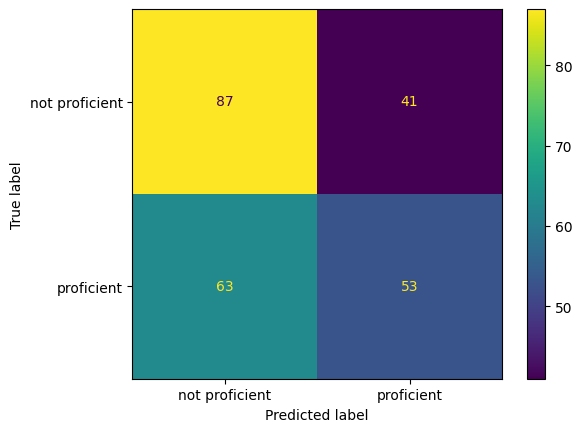

In [ ]:
class_label_predictions = elementary_science_binary_LR.predict(X_test)
cm = confusion_matrix(y_test, class_label_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["not proficient", "proficient"])
disp.plot()
plt.show()

In [ ]:
best_depth, acc_cs = train_best_DT(X_train, X_val, y_train, y_val)

elementary_science_binary_DT = DecisionTreeClassifier(criterion='entropy', max_depth=best_depth)
elementary_science_binary_DT.fit(X_train, y_train)

The depth associated with the highest accuracy (0.5967) is: 5


DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [ ]:
val_accuracy = elementary_science_binary_DT.score(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy}")

test_accuracy = elementary_science_binary_DT.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

Validation Accuracy: 0.5967078189300411
Test Accuracy: 0.5901639344262295


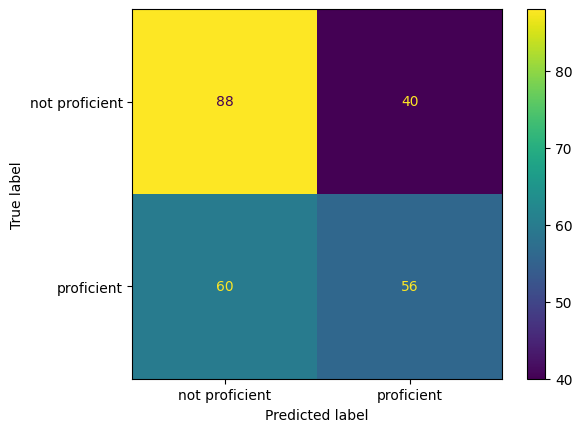

In [ ]:
class_label_predictions = elementary_science_binary_DT.predict(X_test)
cm = confusion_matrix(y_test, class_label_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["not proficient", "proficient"])
disp.plot()
plt.show()

In [ ]:
X = elementary_scores[science_x_columns]
y = elementary_scores[multiclass_science_label]


In [ ]:
X = X[~y.isna()]
y = y[~y.isna()]
print(X.shape)
print(y.shape)

(1622, 4)
(1622,)


In [ ]:

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=92)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=92)

In [ ]:
y_train.value_counts()

,count
science_multiclass_label,
"[-1, 0)",438
"[0, 1)",393
"[-2, -1)",173
"[1, 2)",117
"(-inf, -2)",14


In [ ]:
best_c,ll_cs,acc_cs = train_best_ld(X_train, y_train, X_val, y_val, cs, max_iter2=900)

elementary_science_multiclass_LR = LogisticRegression(C=best_c, max_iter=900)
elementary_science_multiclass_LR.fit(X_train, y_train)

The C value associated with the highest accuracy (0.4156) is: 0.1


LogisticRegression(C=0.1, max_iter=900)

 **Important note here! Scikit-learn itself says that it struggles to fit this data. We had to increase the number of iterations for it to converge on a solution. This may mean that the fit between the x and the y here is especially bad.**

In [ ]:
val_accuracy = elementary_science_multiclass_LR.score(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy}")

test_accuracy = elementary_science_multiclass_LR.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

Validation Accuracy: 0.4156378600823045
Test Accuracy: 0.4385245901639344


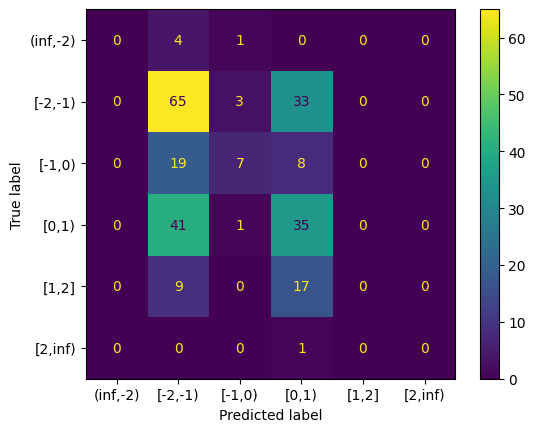

In [ ]:
class_label_predictions = elementary_science_multiclass_LR.predict(X_test)
cm = confusion_matrix(y_test, class_label_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["(inf,-2)", "[-2,-1)","[-1,0)","[0,1)", "[1,2]", "[2,inf)"])
disp.plot()
plt.show()

In [ ]:
y_test.value_counts()

,count
science_multiclass_label,
"[-1, 0)",101
"[0, 1)",77
"[-2, -1)",34
"[1, 2)",26
"(-inf, -2)",5
"[2, inf)",1


In [ ]:
best_depth, acc_cs = train_best_DT(X_train, X_val, y_train, y_val)

elementary_science_multiclass_DT = DecisionTreeClassifier(criterion='entropy', max_depth=best_depth)
elementary_science_multiclass_DT.fit(X_train, y_train)

The depth associated with the highest accuracy (0.4362) is: 3


DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
val_accuracy = elementary_science_multiclass_DT.score(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy}")

test_accuracy = elementary_science_multiclass_DT.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

Validation Accuracy: 0.43621399176954734
Test Accuracy: 0.36475409836065575


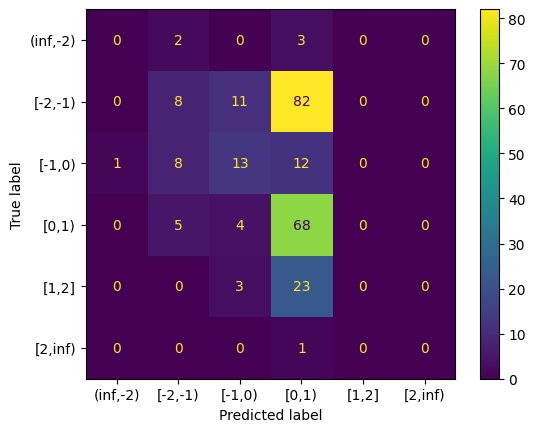

In [ ]:
class_label_predictions = elementary_science_multiclass_DT.predict(X_test)
cm = confusion_matrix(y_test, class_label_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["(inf,-2)", "[-2,-1)","[-1,0)","[0,1)", "[1,2]", "[2,inf)"])
disp.plot()
plt.show()

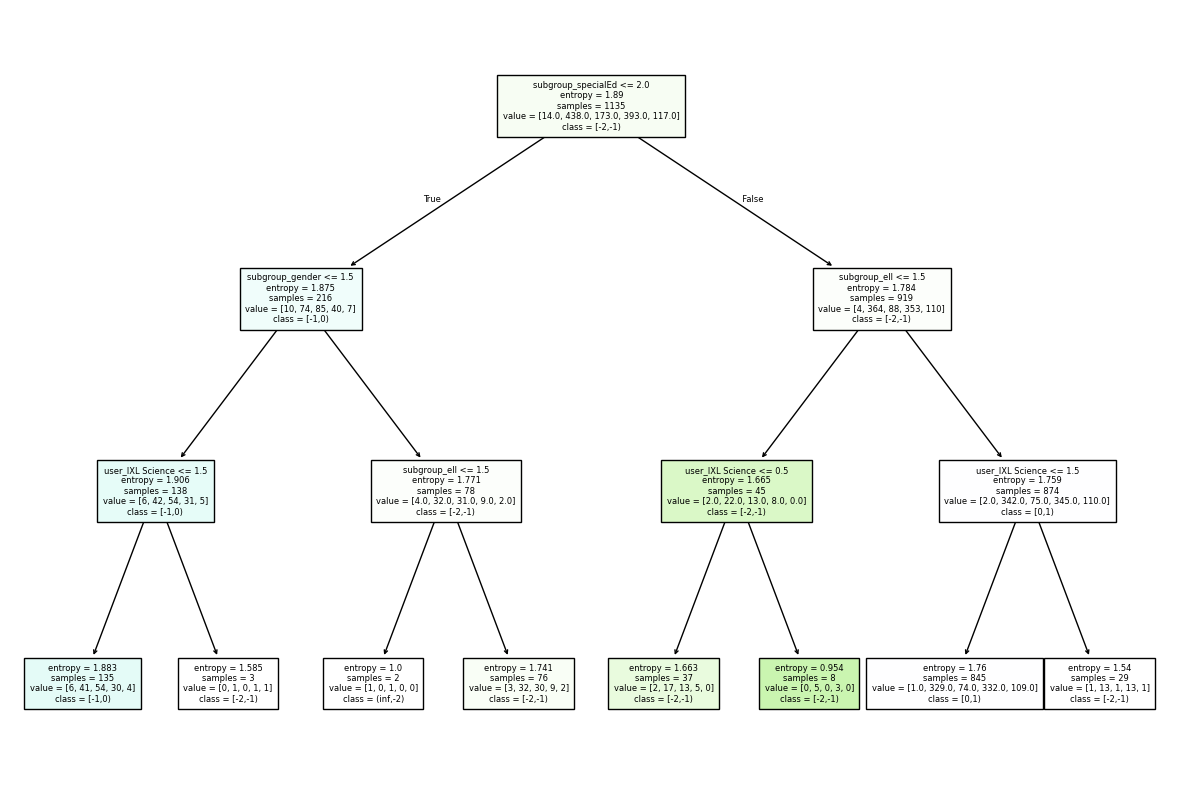

In [ ]:
fig = plt.figure(figsize=(15, 10))
_ = tree.plot_tree(
    elementary_science_multiclass_DT,
    feature_names=X.columns,
    class_names=["(inf,-2)", "[-2,-1)","[-1,0)","[0,1)", "[1,2]", "[2,inf)"],
    filled=True,
    fontsize=6
)
plt.show()

#Middle school

##Coed

###Math

In [ ]:
middle_scores

,studentId,user_IXL SS,user_IXL Science,user_IXL Math,user_IXL Reading,user_AR,subgroup_ell,user_Reflex M,subgroup_specialEd,subgroup_gender,studentLevel,measurementTypeId,ela_binary_label,ela_multiclass_label,math_binary_label,math_multiclass_label,science_binary_label,science_multiclass_label,history_binary_label,history_multiclass_label
0,1482411,0,0,1,1,0,2.0,0,3.0,2.0,6.0,8,negative,"[-1, 0)",negative,"[-1, 0)",negative,"[-1, 0)",positive,"[1, 2)"
1,1482412,0,2,0,0,0,2.0,0,3.0,2.0,6.0,10,positive,"[0, 1)",negative,"[-1, 0)",negative,"[-1, 0)",positive,"[0, 1)"
2,1482413,0,2,0,1,0,2.0,0,3.0,1.0,6.0,17,positive,"[0, 1)",positive,"[0, 1)",positive,"[0, 1)",positive,"[0, 1)"
3,1482427,0,0,1,1,0,2.0,0,3.0,1.0,6.0,17,positive,"[0, 1)",positive,"[0, 1)",positive,"[0, 1)",positive,"[1, 2)"
4,1482428,0,1,0,2,0,2.0,0,1.0,2.0,6.0,10,negative,"[-1, 0)",negative,"[-2, -1)",negative,"[-1, 0)",positive,"[1, 2)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956,2513393,0,0,0,0,0,2.0,0,3.0,2.0,8.0,17,positive,"[0, 1)",negative,"[-2, -1)",negative,"[-1, 0)",negative,"[-1, 0)"
957,2513394,0,0,0,0,0,2.0,0,3.0,2.0,8.0,10,positive,"[0, 1)",negative,"[-2, -1)",negative,"[-1, 0)",negative,"[-1, 0)"
958,2513431,0,0,0,0,0,2.0,0,3.0,2.0,8.0,10,negative,"[-1, 0)",negative,"[-2, -1)",negative,"[-2, -1)",negative,"(-inf, -2)"
959,2513432,0,0,0,0,0,2.0,0,3.0,1.0,8.0,11,negative,"[-2, -1)",negative,"[-2, -1)",negative,"[-2, -1)",positive,"[0, 1)"


In [ ]:
print(middle_scores['subgroup_gender'].unique())
print(middle_scores['subgroup_specialEd'].unique())
print(middle_scores['subgroup_ell'].unique())
print(middle_scores['user_IXL SS'].unique())
print(middle_scores['user_IXL Science'].unique())
print(middle_scores['user_IXL SS'].unique())

[2. 1. 0.]
[3. 1. 0.]
[2. 0. 1.]
[0 2 1]
[0 2 1]
[0 2 1]


IXL SS AND SCIENCE ARE EMPTY FOR FIRST GRADERS. ADDITIONALLY, GENDER DATA IS DEPRICATED FOR FIRST GRADERS


In [ ]:
math_x_columns

['subgroup_ell',
 'subgroup_specialEd',
 'subgroup_gender',
 'user_IXL Math',
 'user_Reflex M']

In [ ]:
# Split the data into training, validation, and test sets
X = middle_scores[math_x_columns]
y = middle_scores[binary_math_label]
X

,subgroup_ell,subgroup_specialEd,subgroup_gender,user_IXL Math,user_Reflex M
0,2.0,3.0,2.0,1,0
1,2.0,3.0,2.0,0,0
2,2.0,3.0,1.0,0,0
3,2.0,3.0,1.0,1,0
4,2.0,1.0,2.0,0,0
...,...,...,...,...,...
956,2.0,3.0,2.0,0,0
957,2.0,3.0,2.0,0,0
958,2.0,3.0,2.0,0,0
959,2.0,3.0,1.0,0,0


In [ ]:
# Drop rows where 'y' is NaN
X = X[~y.isna()]
y = y[~y.isna()]

#Verify the change
print("X shape:", X.shape)
print("y shape:", y.shape)

#You can now re-split your data if needed
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
X

X shape: (2771, 5)
y shape: (2771,)
X_train shape: (1939, 5)
y_train shape: (1939,)
X_val shape: (416, 5)
y_val shape: (416,)
X_test shape: (416, 5)
y_test shape: (416,)


,subgroup_ell,subgroup_specialEd,subgroup_gender,user_IXL Math,user_Reflex M
0,2.0,3.0,2.0,1,0
1,2.0,3.0,2.0,0,0
2,2.0,3.0,1.0,0,0
3,2.0,3.0,1.0,1,0
4,2.0,1.0,2.0,0,0
...,...,...,...,...,...
956,2.0,3.0,2.0,0,0
957,2.0,3.0,2.0,0,0
958,2.0,3.0,2.0,0,0
959,2.0,3.0,1.0,0,0


In [ ]:
best_c,ll_cs,acc_cs = train_best_ld(X_train, y_train, X_val, y_val, cs)

middle_math_binary_LR = LogisticRegression(C=best_c)
middle_math_binary_LR.fit(X_train, y_train)

The C value associated with the highest accuracy (0.7404) is: 1e-10


LogisticRegression(C=1e-10)

In [ ]:
val_accuracy = middle_math_binary_LR.score(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy}")

test_accuracy = middle_math_binary_LR.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

Validation Accuracy: 0.7403846153846154
Test Accuracy: 0.7259615384615384


In [ ]:
# # Ensure X and y are aligned
# X = middle_scores[['subgroup_ell', 'subgroup_specialEd']]  # Features
# y = middle_scores[binary_math_label]  # Target variable

# # Drop rows where either X or y has NaN values
# df = pd.concat([X, y], axis=1).dropna()  # Combine X and y, then drop rows with NaN
# X = df[['subgroup_ell', 'subgroup_specialEd']]  # Re-select features
# y = df[binary_math_label]  # Re-select the target

# # Verify shapes
# print(f"Shape of X: {X.shape}")
# print(f"Shape of y: {y.shape}")

# # Convert categorical labels to numeric labels
# y_numeric = y.map({'negative': 0, 'positive': 1})

# # Split the data into train/test
# X_train, X_test, y_train, y_test = train_test_split(X, y_numeric, test_size=0.3, random_state=42)

# # Train Logistic Regression model
# model = LogisticRegression(max_iter=1000)
# model.fit(X_train, y_train)

# # Verify the model is trained and classes are identified
# print(f"Classes found by the model: {model.classes_}")

# # Create a grid for plotting decision boundary
# x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
# y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
# xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
#                      np.linspace(y_min, y_max, 100))

# # Flatten the grid to pass into the model
# grid = np.c_[xx.ravel(), yy.ravel()]
# grid_df = pd.DataFrame(grid, columns=X_train.columns)  # Ensure column names match

# # Predict probabilities for each point on the grid
# y_prob = model.predict_proba(grid_df)[:, 1].reshape(xx.shape)

# # Plot decision boundary and data points
# plt.figure(figsize=(8, 6))
# plt.contourf(xx, yy, y_prob, alpha=0.8, cmap='coolwarm')  # Decision boundary
# plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, cmap='bwr', edgecolors='k', marker='o', alpha=0.6)
# plt.title("Logistic Regression Decision Boundary")
# plt.xlabel("Feature 1 (subgroup_ell)")
# plt.ylabel("Feature 2 (subgroup_specialEd)")
# plt.colorbar(label="Predicted Probability")
# plt.show()

# # Print model accuracy
# train_accuracy = model.score(X_train, y_train)
# test_accuracy = model.score(X_test, y_test)
# print(f"Train Accuracy: {train_accuracy}")
# print(f"Test Accuracy: {test_accuracy}")


In [ ]:
best_depth, acc_cs = train_best_DT(X_train, X_val, y_train, y_val)

middle_math_binary_DT = DecisionTreeClassifier(criterion='entropy', max_depth=best_depth)
middle_math_binary_DT.fit(X_train, y_train)

The depth associated with the highest accuracy (0.7452) is: 5


DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [ ]:
X_train

,subgroup_ell,subgroup_specialEd,subgroup_gender,user_IXL Math,user_Reflex M
785,2.0,3.0,1.0,2,0
922,2.0,3.0,2.0,0,0
179,2.0,3.0,1.0,0,0
950,1.0,3.0,2.0,0,0
463,2.0,3.0,1.0,2,0
...,...,...,...,...,...
739,2.0,3.0,1.0,0,0
196,2.0,3.0,2.0,2,0
231,2.0,3.0,1.0,1,0
395,2.0,3.0,2.0,0,0


In [ ]:
val_accuracy = middle_math_binary_DT.score(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy}")

test_accuracy = middle_math_binary_DT.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

Validation Accuracy: 0.7451923076923077
Test Accuracy: 0.7307692307692307


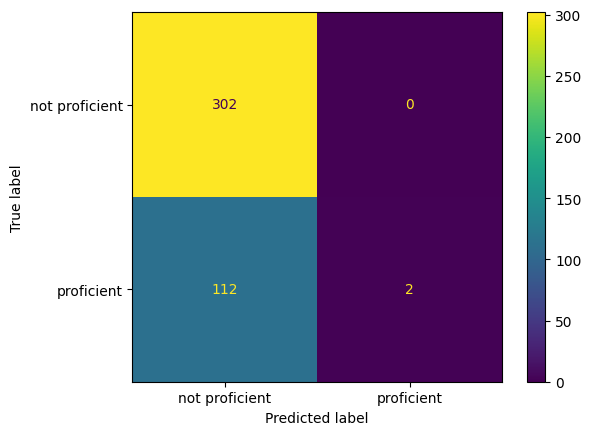

In [ ]:
class_label_predictions = middle_math_binary_DT.predict(X_test)
cm = confusion_matrix(y_test, class_label_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["not proficient", "proficient"])
disp.plot()
plt.show()

In [ ]:
X = middle_scores[math_x_columns]
y = middle_scores[multiclass_math_label]

In [ ]:
# Drop rows where 'y' is NaN
X = X[~y.isna()]
y = y[~y.isna()]

#Verify the change
print("X shape:", X.shape)
print("y shape:", y.shape)

#You can now re-split your data if needed
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=92)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=92)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X shape: (2771, 5)
y shape: (2771,)
X_train shape: (1939, 5)
y_train shape: (1939,)
X_val shape: (416, 5)
y_val shape: (416,)
X_test shape: (416, 5)
y_test shape: (416,)


In [ ]:
best_c,ll_cs,acc_cs = train_best_ld(X_train, y_train, X_val, y_val, cs, max_iter2=900)

middle_math_multiclass_LR = LogisticRegression(C=best_c)
middle_math_multiclass_LR.fit(X_train, y_train)

The C value associated with the highest accuracy (0.4856) is: 1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1)

In [ ]:
val_accuracy = middle_math_multiclass_LR.score(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy}")

test_accuracy = middle_math_multiclass_LR.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

Validation Accuracy: 0.4855769230769231
Test Accuracy: 0.4254807692307692


In [ ]:
np.unique(class_label_predictions)

array(['negative', 'positive'], dtype=object)

In [ ]:
y_test.value_counts()

,count
math_multiclass_label,
"[-1, 0)",165
"[0, 1)",113
"[-2, -1)",102
"[1, 2)",25
"(-inf, -2)",11


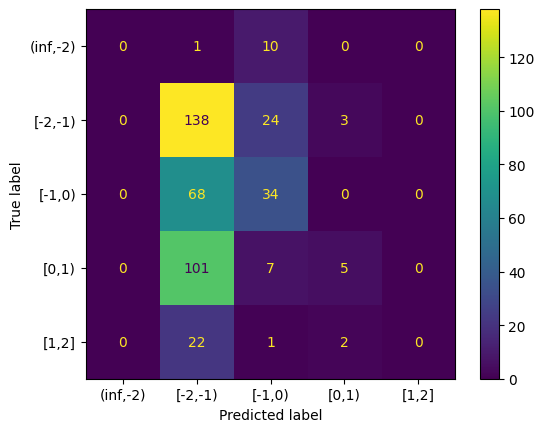

In [ ]:
class_label_predictions = middle_math_multiclass_LR.predict(X_test)
cm = confusion_matrix(y_test, class_label_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["(inf,-2)", "[-2,-1)","[-1,0)","[0,1)", "[1,2]"])
disp.plot()
plt.show()

In [ ]:
best_depth, acc_cs = train_best_DT(X_train, X_val, y_train, y_val)

middle_math_multiclass_DT = DecisionTreeClassifier(criterion='entropy', max_depth=best_depth)
middle_math_multiclass_DT.fit(X_train, y_train)

The depth associated with the highest accuracy (0.4880) is: 3


DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
val_accuracy = middle_math_multiclass_DT.score(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy}")

test_accuracy = middle_math_multiclass_DT.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

Validation Accuracy: 0.4879807692307692
Test Accuracy: 0.41346153846153844


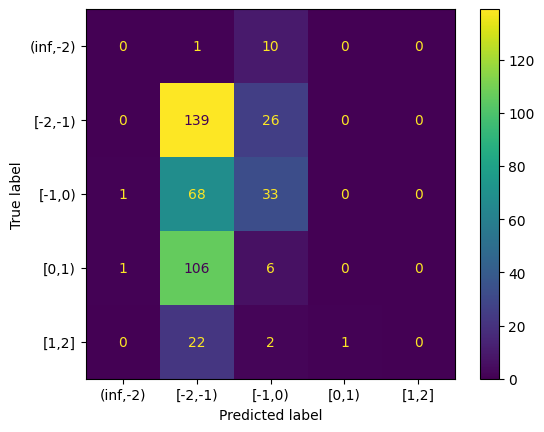

In [ ]:
class_label_predictions = middle_math_multiclass_DT.predict(X_test)
cm = confusion_matrix(y_test, class_label_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["(inf,-2)", "[-2,-1)","[-1,0)","[0,1)", "[1,2]"])
disp.plot()
plt.show()

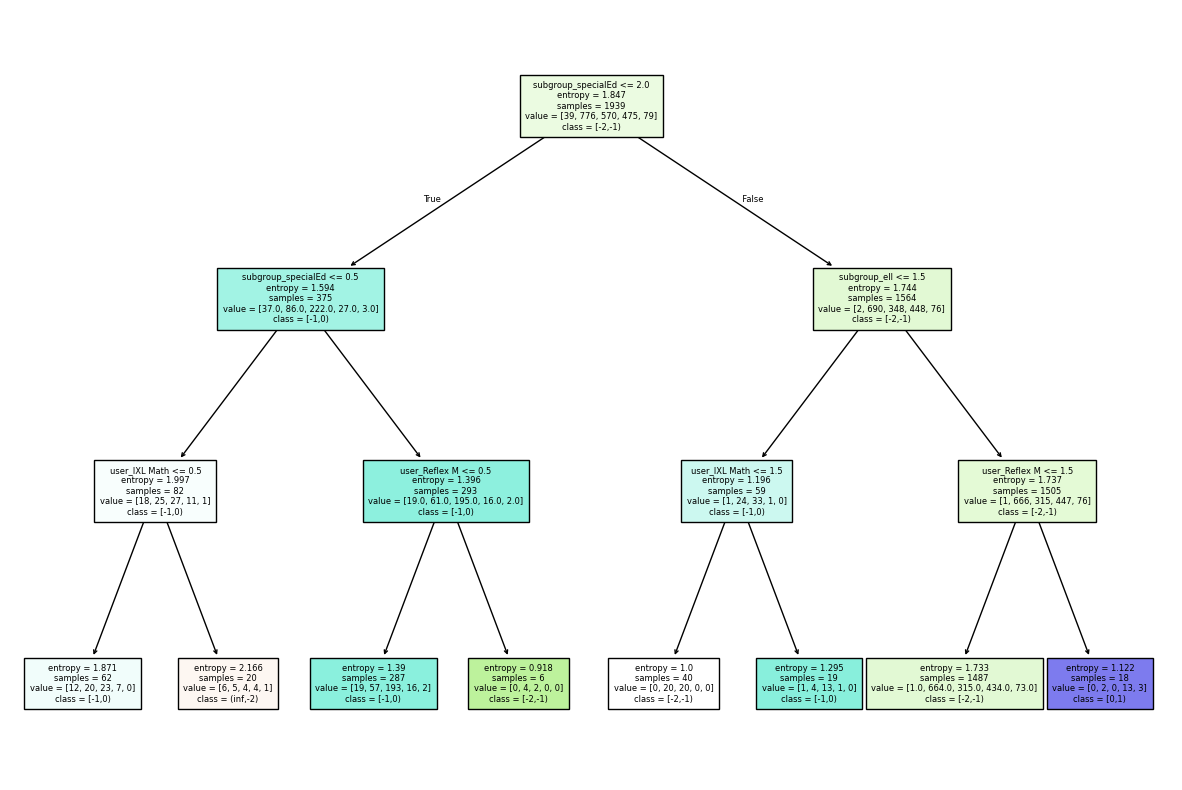

In [ ]:
fig = plt.figure(figsize=(15, 10))
_ = tree.plot_tree(
  middle_math_multiclass_DT,
    feature_names=X.columns,
    class_names=["(inf,-2)", "[-2,-1)","[-1,0)","[0,1)", "[1,2]"],
    filled=True,
    fontsize=6
)
plt.show()

###ELA

In [ ]:
print(ela_x_columns)
print(binary_ela_label)
print(multiclass_ela_label)

['subgroup_ell', 'subgroup_specialEd', 'subgroup_gender', 'user_IXL Reading', 'user_AR']
ela_binary_label
ela_multiclass_label


In [ ]:
X = middle_scores[ela_x_columns]
y = middle_scores[binary_ela_label]

In [ ]:
X = X[~y.isna()]
y = y[~y.isna()]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
best_c,ll_cs,acc_cs = train_best_ld(X_train, y_train, X_val, y_val, cs, max_iter2=200)

middle_ela_binary_LR = LogisticRegression(C=best_c)
middle_ela_binary_LR.fit(X_train, y_train)

The C value associated with the highest accuracy (0.6130) is: 0.01


LogisticRegression(C=0.01)

In [ ]:
val_accuracy = middle_ela_binary_LR.score(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy}")

test_accuracy = middle_ela_binary_LR.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

Validation Accuracy: 0.6129807692307693
Test Accuracy: 0.5731414868105515


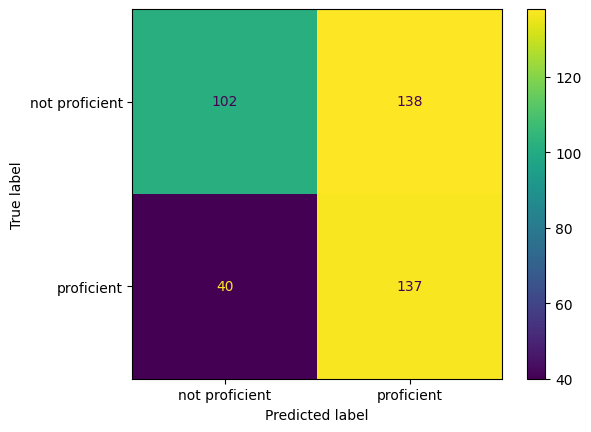

In [ ]:
class_label_predictions = middle_ela_binary_LR.predict(X_test)
cm = confusion_matrix(y_test, class_label_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["not proficient", "proficient"])
disp.plot()
plt.show()

In [ ]:
best_depth, acc_cs = train_best_DT(X_train, X_val, y_train, y_val)

middle_ela_binary_DT = DecisionTreeClassifier(criterion='entropy', max_depth=best_depth)
middle_ela_binary_DT.fit(X_train, y_train)

The depth associated with the highest accuracy (0.6202) is: 5


DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [ ]:
val_accuracy = middle_ela_binary_DT.score(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy}")

test_accuracy = middle_ela_binary_DT.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

Validation Accuracy: 0.6201923076923077
Test Accuracy: 0.5827338129496403


In [ ]:
# class_label_predictions = middle_ela_binary_LR.predict(X_test)
# cm = confusion_matrix(y_test, class_label_predictions)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["not proficient", "proficient"])
# disp.plot()
# plt.show()

In [ ]:
X = middle_scores[ela_x_columns]
y = middle_scores[multiclass_ela_label]


In [ ]:
X = X[~y.isna()]
y = y[~y.isna()]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
best_c,ll_cs,acc_cs = train_best_ld(X_train, y_train, X_val, y_val, cs, max_iter2=900)

middle_ela_multiclass_LR = LogisticRegression(C=best_c)
middle_ela_multiclass_LR.fit(X_train, y_train)

The C value associated with the highest accuracy (0.4255) is: 0.1


LogisticRegression(C=0.1)

In [ ]:
val_accuracy = middle_ela_multiclass_LR.score(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy}")

test_accuracy = middle_ela_multiclass_LR.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

Validation Accuracy: 0.4254807692307692
Test Accuracy: 0.4196642685851319


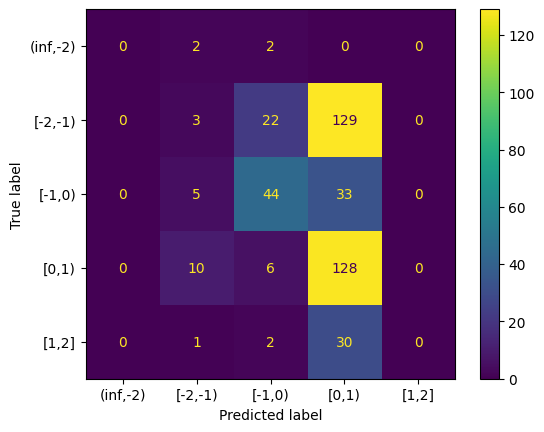

In [ ]:
class_label_predictions = middle_ela_multiclass_LR.predict(X_test)
cm = confusion_matrix(y_test, class_label_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["(inf,-2)", "[-2,-1)","[-1,0)","[0,1)", "[1,2]"])
disp.plot()
plt.show()

In [ ]:
best_depth, acc_cs = train_best_DT(X_train, X_val, y_train, y_val)

middle_ela_multiclass_DT = DecisionTreeClassifier(criterion='entropy', max_depth=best_depth)
middle_ela_multiclass_DT.fit(X_train, y_train)

The depth associated with the highest accuracy (0.4303) is: 3


DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
val_accuracy = middle_ela_multiclass_DT.score(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy}")

test_accuracy = middle_ela_multiclass_DT.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

Validation Accuracy: 0.43028846153846156
Test Accuracy: 0.4244604316546763


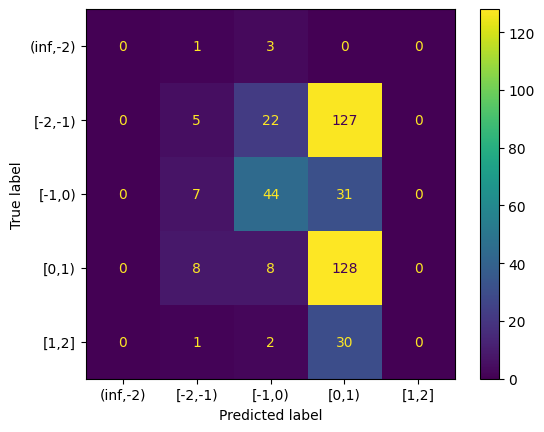

In [ ]:
class_label_predictions = middle_ela_multiclass_DT.predict(X_test)
cm = confusion_matrix(y_test, class_label_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["(inf,-2)", "[-2,-1)","[-1,0)","[0,1)", "[1,2]"])
disp.plot()
plt.show()

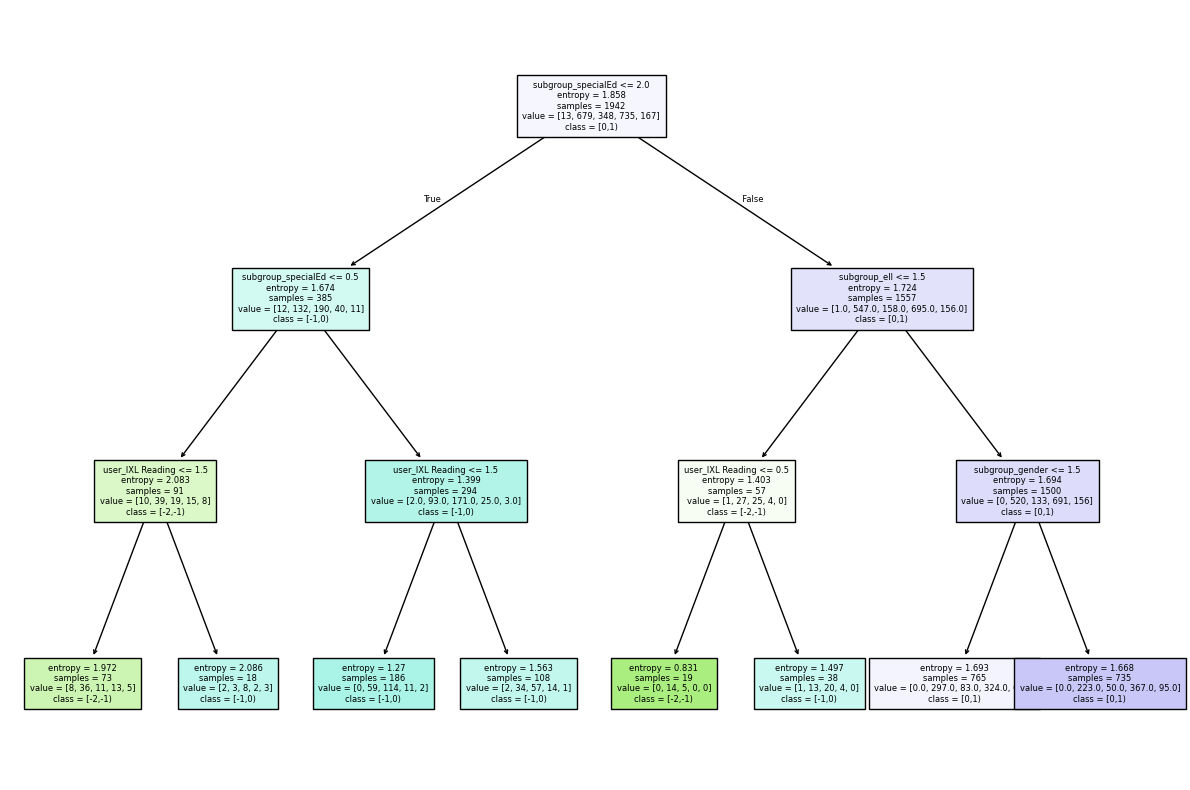

In [ ]:
fig = plt.figure(figsize=(15, 10))
_ = tree.plot_tree(
  middle_ela_multiclass_DT,
    feature_names=X.columns,
    class_names=["(inf,-2)", "[-2,-1)","[-1,0)","[0,1)", "[1,2]"],
    filled=True,
    fontsize=6
)
plt.show()

###History

In [ ]:
print(history_x_columns)
print(binary_history_label)
print(multiclass_history_label)

['subgroup_ell', 'subgroup_specialEd', 'subgroup_gender', 'user_IXL SS']
history_binary_label
history_multiclass_label


In [ ]:
X = middle_scores[history_x_columns]
y = middle_scores[binary_history_label]

In [ ]:
# Drop rows where 'y' is NaN
X = X[~y.isna()]
y = y[~y.isna()]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
best_c,ll_cs,acc_cs = train_best_ld(X_train, y_train, X_val, y_val, cs, max_iter2=100)

middle_history_binary_LR = LogisticRegression(C=best_c)
middle_history_binary_LR.fit(X_train, y_train)

The C value associated with the highest accuracy (0.7889) is: 1e-10


LogisticRegression(C=1e-10)

In [ ]:
val_accuracy = middle_history_binary_LR.score(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy}")

test_accuracy = middle_history_binary_LR.score(X_val, y_val)
print(f"Validation Accuracy: {test_accuracy}")

Validation Accuracy: 0.7889182058047494
Validation Accuracy: 0.7889182058047494


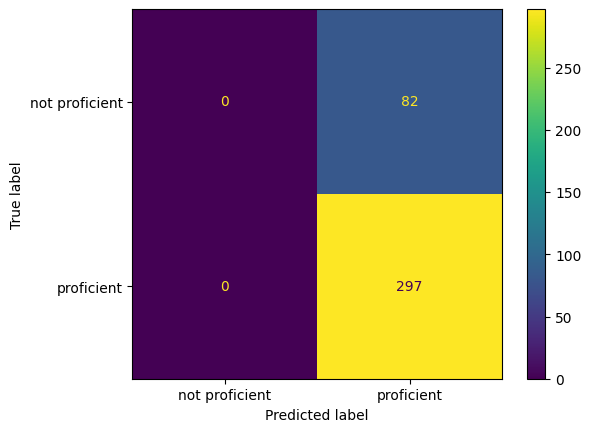

In [ ]:
class_label_predictions = middle_history_binary_LR.predict(X_test)
cm = confusion_matrix(y_test, class_label_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["not proficient", "proficient"])
disp.plot()
plt.show()

In [ ]:
best_depth, acc_cs = train_best_DT(X_train, X_val, y_train, y_val)

middle_history_binary_DT = DecisionTreeClassifier(criterion='entropy', max_depth=best_depth)
middle_history_binary_DT.fit(X_train, y_train)

The depth associated with the highest accuracy (0.7889) is: 3


DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
val_accuracy = middle_history_binary_DT.score(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy}")

test_accuracy = middle_history_binary_DT.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

Validation Accuracy: 0.7889182058047494
Test Accuracy: 0.783641160949868


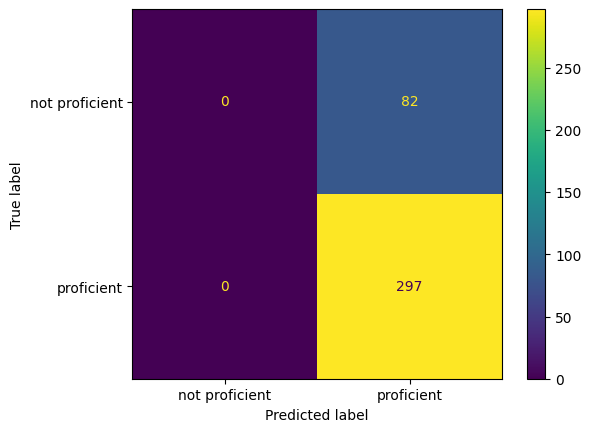

In [ ]:
class_label_predictions = middle_history_binary_DT.predict(X_test)
cm = confusion_matrix(y_test, class_label_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["not proficient", "proficient"])
disp.plot()
plt.show()

In [ ]:
X = middle_scores[history_x_columns]
y = middle_scores[multiclass_history_label]

In [ ]:
# Drop rows where 'y' is NaN
X = X[~y.isna()]
y = y[~y.isna()]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [ ]:
best_c,ll_cs,acc_cs = train_best_ld(X_train, y_train, X_val, y_val, cs, max_iter2=900)

middle_history_multiclass_LR = LogisticRegression(C=best_c, max_iter=900)
middle_history_multiclass_LR.fit(X_train, y_train)

 **Important note here! Scikit-learn itself says that it struggles to fit this data. We had to increase the number of iterations for it to converge on a solution. This may mean that the fit between the x and the y here is especially bad.**

In [ ]:
val_accuracy = middle_history_multiclass_LR.score(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy}")

test_accuracy = middle_history_multiclass_LR.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

In [ ]:
# class_label_predictions = middle_history_multiclass_LR.predict(X_test)
# cm = confusion_matrix(y_test, class_label_predictions)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["(inf,-2)", "[-2,-1)","[-1,0)","[0,1)", "[1,2]", "[2,inf)"])
# disp.plot()
# plt.show()

In [ ]:
best_depth, acc_cs = train_best_DT(X_train, X_val, y_train, y_val)

middle_history_multiclass_DT = DecisionTreeClassifier(criterion='entropy', max_depth=best_depth)
middle_history_multiclass_DT.fit(X_train, y_train)

In [ ]:
val_accuracy = middle_history_multiclass_DT.score(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy}")

test_accuracy = middle_history_multiclass_DT.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

In [ ]:
class_label_predictions = middle_history_multiclass_DT.predict(X_test)
cm = confusion_matrix(y_test, class_label_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["(inf,-2)", "[-2,-1)","[-1,0)","[0,1)", "[1,2]", "[2,inf)"])
disp.plot()
plt.show()

In [ ]:
fig = plt.figure(figsize=(15, 10))
_ = tree.plot_tree(
  middle_history_multiclass_DT,
    feature_names=X.columns,
    class_names=["(inf,-2)", "[-2,-1)","[-1,0)","[0,1)", "[1,2]", "[2,inf)"],
    filled=True,
    fontsize=6
)
plt.show()

###Science

In [ ]:
print(science_x_columns)
print(binary_science_label)
print(multiclass_science_label)

In [ ]:
X = middle_scores[science_x_columns]
y = middle_scores[binary_science_label]

In [ ]:
# Drop rows where 'y' is NaN
X = X[~y.isna()]
y = y[~y.isna()]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
best_c,ll_cs,acc_cs = train_best_ld(X_train, y_train, X_val, y_val, cs, max_iter2=100)

middle_science_binary_LR = LogisticRegression(C=best_c)
middle_science_binary_LR.fit(X_train, y_train)

In [ ]:
# Evaluate the model on the validation set
val_accuracy = middle_science_binary_LR.score(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy}")

test_accuracy = middle_science_binary_LR.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

In [ ]:
class_label_predictions = middle_science_binary_LR.predict(X_test)
cm = confusion_matrix(y_test, class_label_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["not proficient", "proficient"])
disp.plot()
plt.show()

In [ ]:
best_depth, acc_cs = train_best_DT(X_train, X_val, y_train, y_val)

middle_science_binary_DT = DecisionTreeClassifier(criterion='entropy', max_depth=best_depth)
middle_science_binary_DT.fit(X_train, y_train)

In [ ]:
val_accuracy = middle_science_binary_DT.score(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy}")

test_accuracy = middle_science_binary_DT.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

In [ ]:
class_label_predictions = middle_science_binary_DT.predict(X_test)
cm = confusion_matrix(y_test, class_label_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["not proficient", "proficient"])
disp.plot()
plt.show()

In [ ]:
X = middle_scores[science_x_columns]
y = middle_scores[multiclass_science_label]


In [ ]:
X = X[~y.isna()]
y = y[~y.isna()]
print(X.shape)
print(y.shape)

In [ ]:

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=112)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=112)

In [ ]:
y_train.value_counts()

In [ ]:
best_c,ll_cs,acc_cs = train_best_ld(X_train, y_train, X_val, y_val, cs, max_iter2=900)

middle_science_multiclass_LR = LogisticRegression(C=best_c, max_iter=900)
middle_science_multiclass_LR.fit(X_train, y_train)

 **Important note here! Scikit-learn itself says that it struggles to fit this data. We had to increase the number of iterations for it to converge on a solution. This may mean that the fit between the x and the y here is especially bad.**

In [ ]:
val_accuracy = middle_science_multiclass_LR.score(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy}")

test_accuracy = middle_science_multiclass_LR.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

In [ ]:
X_test['user_IXL Science']

In [ ]:
probability_predictions = middle_science_multiclass_LR.predict_proba(X_test)
probability_df = pd.DataFrame(probability_predictions)
probability_df

In [ ]:
middle_science_multiclass_LR.predict_proba(X_test)[402]

In [ ]:
# class_label_predictions = middle_science_multiclass_LR.predict(X_test)
# cm = confusion_matrix(y_test, class_label_predictions)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["(inf,-2)", "[-2,-1)","[-1,0)","[0,1)","[1,2]","[2,inf)"])
# disp.plot()
# plt.show()

In [ ]:
y_test.value_counts()

In [ ]:
best_depth, acc_cs = train_best_DT(X_train, X_val, y_train, y_val)

middle_science_multiclass_DT = DecisionTreeClassifier(criterion='entropy', max_depth=best_depth)
middle_science_multiclass_DT.fit(X_train, y_train)

In [ ]:
val_accuracy = middle_science_multiclass_DT.score(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy}")

test_accuracy = middle_science_multiclass_DT.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

In [ ]:
# class_label_predictions = middle_science_multiclass_DT.predict(X_test)
# cm = confusion_matrix(y_test, class_label_predictions)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["(inf,-2)", "[-2,-1)","[-1,0)","[0,1)", "[1,2]", "[2,inf)"])
# disp.plot()
# plt.show()

In [ ]:
y_train.value_counts()

In [ ]:
fig = plt.figure(figsize=(15, 10))
_ = tree.plot_tree(
  middle_science_multiclass_DT,
    feature_names=X.columns,
    class_names=["(inf,-2)", "[-2,-1)","[-1,0)","[0,1)", "[1,2]", "[2,inf)"],
    filled=True,
    fontsize=6
)
plt.show()

#Highschool

##Coed

###Math

In [ ]:
highschool_scores

In [ ]:
print(highschool_scores['subgroup_gender'].unique())
print(highschool_scores['subgroup_specialEd'].unique())
print(highschool_scores['subgroup_ell'].unique())
print(highschool_scores['user_IXL SS'].unique())
print(highschool_scores['user_IXL Science'].unique())
print(highschool_scores['user_IXL SS'].unique())

In [ ]:
math_x_columns

In [ ]:
# Split the data into training, validation, and test sets
X = highschool_scores[math_x_columns]
y = highschool_scores[binary_math_label]


In [ ]:
# Drop rows where 'y' is NaN
X = X[~y.isna()]
y = y[~y.isna()]

#Verify the change
print("X shape:", X.shape)
print("y shape:", y.shape)

#You can now re-split your data if needed
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

In [ ]:
best_c,ll_cs,acc_cs = train_best_ld(X_train, y_train, X_val, y_val, cs)

highschool_math_binary_LR = LogisticRegression(C=best_c)
highschool_math_binary_LR.fit(X_train, y_train)

In [ ]:
val_accuracy = highschool_math_binary_LR.score(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy}")

test_accuracy = highschool_math_binary_LR.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

In [ ]:
class_label_predictions = highschool_math_binary_LR.predict(X_test)
cm = confusion_matrix(y_test, class_label_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["not proficient", "proficient"])
disp.plot()
plt.show()

In [ ]:
best_depth, acc_cs = train_best_DT(X_train, X_val, y_train, y_val)

highschool_math_binary_DT = DecisionTreeClassifier(criterion='entropy', max_depth=best_depth)
highschool_math_binary_DT.fit(X_train, y_train)

In [ ]:
val_accuracy = highschool_math_binary_DT.score(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy}")

test_accuracy = highschool_math_binary_DT.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

In [ ]:
class_label_predictions = highschool_math_binary_DT.predict(X_test)
cm = confusion_matrix(y_test, class_label_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["not proficient", "proficient"])
disp.plot()
plt.show()

In [ ]:
X = highschool_scores[math_x_columns]
y = highschool_scores[multiclass_math_label]

In [ ]:
# Drop rows where 'y' is NaN
X = X[~y.isna()]
y = y[~y.isna()]

#Verify the change
print("X shape:", X.shape)
print("y shape:", y.shape)

#You can now re-split your data if needed
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=92)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=92)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

In [ ]:
best_c,ll_cs,acc_cs = train_best_ld(X_train, y_train, X_val, y_val, cs, max_iter2=900)

highschool_math_multiclass_LR = LogisticRegression(C=best_c)
highschool_math_multiclass_LR.fit(X_train, y_train)

In [ ]:
val_accuracy = highschool_math_multiclass_LR.score(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy}")

test_accuracy = highschool_math_multiclass_LR.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

In [ ]:
np.unique(class_label_predictions)

In [ ]:
y_test.value_counts()

In [ ]:
# class_label_predictions = highschool_math_multiclass_LR.predict(X_test)
# cm = confusion_matrix(y_test, class_label_predictions)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["(inf,-2)", "[-2,-1)","[-1,0)","[0,1)", "[1,2]"])
# disp.plot()
# plt.show()

In [ ]:
best_depth, acc_cs = train_best_DT(X_train, X_val, y_train, y_val)

highschool_math_multiclass_DT = DecisionTreeClassifier(criterion='entropy', max_depth=best_depth)
highschool_math_multiclass_DT.fit(X_train, y_train)

In [ ]:
val_accuracy = highschool_math_multiclass_DT.score(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy}")

test_accuracy = highschool_math_multiclass_DT.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

In [ ]:
# class_label_predictions = highschool_math_multiclass_DT.predict(X_test)
# cm = confusion_matrix(y_test, class_label_predictions)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["(inf,-2)", "[-2,-1)","[-1,0)","[0,1)", "[1,2]"])
# disp.plot()
# plt.show()

In [ ]:
fig = plt.figure(figsize=(15, 10))
_ = tree.plot_tree(
  highschool_math_multiclass_DT,
    feature_names=X.columns,
    class_names=["(inf,-2)", "[-2,-1)","[-1,0)","[0,1)", "[1,2]"],
    filled=True,
    fontsize=6
)
plt.show()

###ELA

In [ ]:
print(ela_x_columns)
print(binary_ela_label)
print(multiclass_ela_label)

In [ ]:
X = highschool_scores[ela_x_columns]
y = highschool_scores[binary_ela_label]

In [ ]:
X = X[~y.isna()]
y = y[~y.isna()]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
best_c,ll_cs,acc_cs = train_best_ld(X_train, y_train, X_val, y_val, cs, max_iter2=200)

highschool_ela_binary_LR = LogisticRegression(C=best_c)
highschool_ela_binary_LR.fit(X_train, y_train)

In [ ]:
val_accuracy = highschool_ela_binary_LR.score(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy}")

test_accuracy = highschool_ela_binary_LR.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

In [ ]:
class_label_predictions = highschool_ela_binary_LR.predict(X_test)
cm = confusion_matrix(y_test, class_label_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["not proficient", "proficient"])
disp.plot()
plt.show()

In [ ]:
best_depth, acc_cs = train_best_DT(X_train, X_val, y_train, y_val)

highschool_math_binary_DT = DecisionTreeClassifier(criterion='entropy', max_depth=best_depth)
highschool_math_binary_DT.fit(X_train, y_train)

In [ ]:
val_accuracy = highschool_math_binary_DT.score(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy}")

test_accuracy = highschool_math_binary_DT.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

In [ ]:
class_label_predictions = highschool_ela_binary_LR.predict(X_test)
cm = confusion_matrix(y_test, class_label_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["not proficient", "proficient"])
disp.plot()
plt.show()

In [ ]:
X = highschool_scores[ela_x_columns]
y = highschool_scores[multiclass_ela_label]


In [ ]:
X = X[~y.isna()]
y = y[~y.isna()]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
best_c,ll_cs,acc_cs = train_best_ld(X_train, y_train, X_val, y_val, cs, max_iter2=900)

highschool_ela_multiclass_LR = LogisticRegression(C=best_c)
highschool_ela_multiclass_LR.fit(X_train, y_train)

In [ ]:
val_accuracy = highschool_ela_multiclass_LR.score(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy}")

test_accuracy = highschool_ela_multiclass_LR.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

In [ ]:
class_label_predictions = highschool_ela_multiclass_LR.predict(X_test)
cm = confusion_matrix(y_test, class_label_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["(inf,-2)", "[-2,-1)","[-1,0)","[0,1)", "[1,2]", "[2,inf)"])
disp.plot()
plt.show()

In [ ]:
best_depth, acc_cs = train_best_DT(X_train, X_val, y_train, y_val)

highschool_ela_multiclass_DT = DecisionTreeClassifier(criterion='entropy', max_depth=best_depth)
highschool_ela_multiclass_DT.fit(X_train, y_train)

In [ ]:
val_accuracy = highschool_ela_multiclass_DT.score(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy}")

test_accuracy = highschool_ela_multiclass_DT.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

In [ ]:
class_label_predictions = highschool_ela_multiclass_DT.predict(X_test)
cm = confusion_matrix(y_test, class_label_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["(inf,-2)", "[-2,-1)","[-1,0)","[0,1)", "[1,2]", "[2,inf)"])
disp.plot()
plt.show()

In [ ]:
fig = plt.figure(figsize=(15, 10))
_ = tree.plot_tree(
  highschool_ela_multiclass_DT,
    feature_names=X.columns,
    class_names=["(inf,-2)", "[-2,-1)","[-1,0)","[0,1)", "[1,2]","[2,inf]"],
    filled=True,
    fontsize=6
)
plt.show()

###History

In [ ]:
print(history_x_columns)
print(binary_history_label)
print(multiclass_history_label)

In [ ]:
X = highschool_scores[history_x_columns]
y = highschool_scores[binary_history_label]

In [ ]:
# Drop rows where 'y' is NaN
X = X[~y.isna()]
y = y[~y.isna()]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
best_c,ll_cs,acc_cs = train_best_ld(X_train, y_train, X_val, y_val, cs, max_iter2=100)

highschool_history_binary_LR = LogisticRegression(C=best_c)
highschool_history_binary_LR.fit(X_train, y_train)

In [ ]:
val_accuracy = highschool_history_binary_LR.score(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy}")

test_accuracy = highschool_history_binary_LR.score(X_val, y_val)
print(f"Validation Accuracy: {test_accuracy}")

In [ ]:
class_label_predictions = highschool_history_binary_LR.predict(X_test)
cm = confusion_matrix(y_test, class_label_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["not proficient", "proficient"])
disp.plot()
plt.show()

In [ ]:
best_depth, acc_cs = train_best_DT(X_train, X_val, y_train, y_val)

highschool_history_binary_DT = DecisionTreeClassifier(criterion='entropy', max_depth=best_depth)
highschool_history_binary_DT.fit(X_train, y_train)

In [ ]:
val_accuracy = highschool_history_binary_DT.score(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy}")

test_accuracy = highschool_history_binary_DT.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

In [ ]:
class_label_predictions = highschool_history_binary_DT.predict(X_test)
cm = confusion_matrix(y_test, class_label_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["not proficient", "proficient"])
disp.plot()
plt.show()

In [ ]:
X = highschool_scores[history_x_columns]
y = highschool_scores[multiclass_history_label]

In [ ]:
# Drop rows where 'y' is NaN
X = X[~y.isna()]
y = y[~y.isna()]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [ ]:
best_c,ll_cs,acc_cs = train_best_ld(X_train, y_train, X_val, y_val, cs, max_iter2=900)

highschool_history_multiclass_LR = LogisticRegression(C=best_c, max_iter=900)
highschool_history_multiclass_LR.fit(X_train, y_train)

 **Important note here! Scikit-learn itself says that it struggles to fit this data. We had to increase the number of iterations for it to converge on a solution. This may mean that the fit between the x and the y here is especially bad.**

In [ ]:
val_accuracy = highschool_history_multiclass_LR.score(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy}")

test_accuracy = highschool_history_multiclass_LR.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

In [ ]:
class_label_predictions = highschool_history_multiclass_LR.predict(X_test)
cm = confusion_matrix(y_test, class_label_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["(inf,-2)", "[-2,-1)","[-1,0)","[0,1)", "[1,2]", "[2,inf)"])
disp.plot()
plt.show()

In [ ]:
best_depth, acc_cs = train_best_DT(X_train, X_val, y_train, y_val)

highschool_history_multiclass_DT = DecisionTreeClassifier(criterion='entropy', max_depth=best_depth)
highschool_history_multiclass_DT.fit(X_train, y_train)

In [ ]:
val_accuracy = highschool_history_multiclass_DT.score(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy}")

test_accuracy = highschool_history_multiclass_DT.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

In [ ]:
class_label_predictions = highschool_history_multiclass_DT.predict(X_test)
cm = confusion_matrix(y_test, class_label_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["(inf,-2)", "[-2,-1)","[-1,0)","[0,1)", "[1,2]", "[2,inf)"])
disp.plot()
plt.show()

In [ ]:
fig = plt.figure(figsize=(15, 10))
_ = tree.plot_tree(
  highschool_history_multiclass_DT,
    feature_names=X.columns,
    class_names=["(inf,-2)", "[-2,-1)","[-1,0)","[0,1)", "[1,2]","[2,inf]"],
    filled=True,
    fontsize=6
)
plt.show()

###Science

In [ ]:
print(science_x_columns)
print(binary_science_label)
print(multiclass_science_label)

In [ ]:
X = highschool_scores[science_x_columns]
y = highschool_scores[binary_science_label]

In [ ]:
# Drop rows where 'y' is NaN
X = X[~y.isna()]
y = y[~y.isna()]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
best_c,ll_cs,acc_cs = train_best_ld(X_train, y_train, X_val, y_val, cs, max_iter2=100)

highschool_science_binary_LR = LogisticRegression(C=best_c)
highschool_science_binary_LR.fit(X_train, y_train)

In [ ]:
# Evaluate the model on the validation set
val_accuracy = highschool_science_binary_LR.score(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy}")

test_accuracy = highschool_science_binary_LR.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

In [ ]:
class_label_predictions = highschool_science_binary_LR.predict(X_test)
cm = confusion_matrix(y_test, class_label_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["not proficient", "proficient"])
disp.plot()
plt.show()

In [ ]:
best_depth, acc_cs = train_best_DT(X_train, X_val, y_train, y_val)

highschool_science_binary_DT = DecisionTreeClassifier(criterion='entropy', max_depth=best_depth)
highschool_science_binary_DT.fit(X_train, y_train)

In [ ]:
val_accuracy = highschool_science_binary_DT.score(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy}")

test_accuracy = highschool_science_binary_DT.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

In [ ]:
class_label_predictions = highschool_science_binary_DT.predict(X_test)
cm = confusion_matrix(y_test, class_label_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["not proficient", "proficient"])
disp.plot()
plt.show()

In [ ]:
X = highschool_scores[science_x_columns]
y = highschool_scores[multiclass_science_label]


In [ ]:
X = X[~y.isna()]
y = y[~y.isna()]
print(X.shape)
print(y.shape)

In [ ]:

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=112)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=112)

In [ ]:
y_train.value_counts()

In [ ]:
best_c,ll_cs,acc_cs = train_best_ld(X_train, y_train, X_val, y_val, cs, max_iter2=900)

highschool_science_multiclass_LR = LogisticRegression(C=best_c, max_iter=900)
highschool_science_multiclass_LR.fit(X_train, y_train)

 **Important note here! Scikit-learn itself says that it struggles to fit this data. We had to increase the number of iterations for it to converge on a solution. This may mean that the fit between the x and the y here is especially bad.**

In [ ]:
val_accuracy = highschool_science_multiclass_LR.score(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy}")

test_accuracy = highschool_science_multiclass_LR.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

In [ ]:
X_test['user_IXL Science']

In [ ]:
class_label_predictions = highschool_science_multiclass_LR.predict(X_test)
cm = confusion_matrix(y_test, class_label_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["(inf,-2)", "[-2,-1)","[-1,0)","[0,1)", "[1,2]", "[2,inf)"])
disp.plot()
plt.show()

In [ ]:
y_test.value_counts()

In [ ]:
best_depth, acc_cs = train_best_DT(X_train, X_val, y_train, y_val)

highschool_science_multiclass_DT = DecisionTreeClassifier(criterion='entropy', max_depth=best_depth)
highschool_science_multiclass_DT.fit(X_train, y_train)

In [ ]:
val_accuracy = highschool_science_multiclass_DT.score(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy}")

test_accuracy = highschool_science_multiclass_DT.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

In [ ]:
class_label_predictions = highschool_science_multiclass_DT.predict(X_test)
cm = confusion_matrix(y_test, class_label_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["(inf,-2)", "[-2,-1)","[-1,0)","[0,1)", "[1,2]", "[2,inf)"])
disp.plot()
plt.show()

In [ ]:
y_train.value_counts()

In [ ]:
fig = plt.figure(figsize=(15, 10))
_ = tree.plot_tree(
  highschool_science_multiclass_DT,
    feature_names=X.columns,
    class_names=["(inf,-2)", "[-2,-1)","[-1,0)","[0,1)", "[1,2]", "[2,inf)"],
    filled=True,
    fontsize=6
)
plt.show()

###Figures and Analysis

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Generate random data
np.random.seed(0)
X = np.random.randn(100, 1)
y = (X > 0).astype(int).ravel()

# Create and fit the model
model = LogisticRegression()
model.fit(X, y)

# Predict probabilities
X_test = np.linspace(-3, 3, 100).reshape(-1, 1)
y_prob = model.predict_proba(X_test)[:, 1]

# Plot the curve
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', alpha=0.5)
plt.plot(X_test, y_prob, color='red', linewidth=2)
plt.xlabel('Feature')
plt.ylabel('Probability')
plt.title('Logistic Regression Curve')
plt.show()

In [ ]:
# def plot_feature_probability_curves(model, X, y, title):
#     """
#     Plot individual feature vs probability curves for a logistic regression model
#     """
#     # Get feature names used during training and ensure they exist in X
#     features = model.feature_names_in_
#     available_features = [f for f in features if f in X.columns]

#     if len(available_features) == 0:
#         print("No features from the training set found in test data!")
#         return

#     # Calculate number of rows and columns for subplots
#     n_features = len(available_features)
#     n_cols = 3  # You can adjust this
#     n_rows = (n_features + n_cols - 1) // n_cols

#     plt.figure(figsize=(15, 5*n_rows))

#     for idx, feature in enumerate(available_features, 1):
#         plt.subplot(n_rows, n_cols, idx)

#         # Sort the feature values and get corresponding y values
#         sorted_idx = np.argsort(X[feature])
#         x_sorted = X[feature].iloc[sorted_idx]
#         y_sorted = y.iloc[sorted_idx]

#         # Create feature matrix with mean values for other features
#         X_mean = X.copy()
#         for other_feature in available_features:
#             if other_feature != feature:
#                 X_mean[other_feature] = X_mean[other_feature].mean()
#                 # Ensure X_mean has all required features from training
#         for missing_feature in set(features) - set(available_features):
#             X_mean[missing_feature] = 0  # or use the mean from training data if available

#         # Sort the mean feature matrix by current feature
#         X_mean = X_mean.iloc[sorted_idx]

#         # Get probabilities
#         y_prob = model.predict_proba(X_mean)[:, 1]

#         # Plot
#         plt.scatter(x_sorted, y_sorted, color='blue', alpha=0.1, label='Actual')
#         plt.plot(x_sorted, y_prob, color='red', linewidth=2, label='Predicted')
#         plt.xlabel(feature)
#         plt.ylabel('Probability')
#         plt.title(f'{feature} vs Probability')
#         plt.grid(True, alpha=0.3)
#         plt.legend()

#     plt.suptitle(f'Feature vs Probability Curves: {title}', y=1.02)
#     plt.tight_layout()
#     plt.show()

# # Before calling the function, let's verify the features
# # print("Features used in training:", middle_ela_binary_LR.feature_names_in_)
# # print("Features available in test data:", X_test.columns.tolist())

# # Example usage:
# plot_feature_probability_curves(
#     middle_math_binary_LR,
#     X_test,
#     y_test,
#     'Middle School Math'
# )

In [ ]:
def analyze_logistic_regression_weights(model, title, binary=True):
    """
    Extract and display weights from a logistic regression model
    """
    # Get feature names used during training
    features = model.feature_names_in_

    if binary:
        # For binary classification
        weights_df = pd.DataFrame({
            'Feature': features,
            'Weight': model.coef_[0],
            'Abs_Weight': abs(model.coef_[0])
        })
        weights_df = weights_df.sort_values('Abs_Weight', ascending=False)

        print(f"\n=== {title} Binary Model Weights ===")
        print(f"Intercept: {model.intercept_[0]:.4f}")
        print("\nFeature Weights (sorted by absolute value):")
        print(weights_df[['Feature', 'Weight']].to_string(index=False))

        # Visualize weights
        plt.figure(figsize=(10, 6))
        plt.bar(weights_df['Feature'], weights_df['Weight'])
        plt.xticks(rotation=45, ha='right')
        plt.xlabel('Features')
        plt.ylabel('Weight Value')
        plt.title(f'{title} Binary Model Weights')
        plt.tight_layout()
        plt.show()

    else:
        # For multiclass classification
        n_classes = len(model.classes_)

        # Create a DataFrame with weights for each class
        weights_dict = {'Feature': features}
        for i, class_label in enumerate(model.classes_):
            weights_dict[f'Class_{class_label}'] = model.coef_[i]

        weights_df = pd.DataFrame(weights_dict)

        print(f"\n=== {title} Multiclass Model Weights ===")
        print("\nIntercepts:")
        for i, class_label in enumerate(model.classes_):
            print(f"Class {class_label}: {model.intercept_[i]:.4f}")

        print("\nFeature Weights:")
        print(weights_df.to_string(index=False))

        # Visualize weights for each class
        plt.figure(figsize=(15, 5*((n_classes+1)//2)))
        for i, class_label in enumerate(model.classes_):
            plt.subplot((n_classes+1)//2, 2, i+1)
            plt.bar(features, model.coef_[i])
            plt.xticks(rotation=45, ha='right')
            plt.xlabel('Features')
            plt.ylabel('Weight Value')
            plt.title(f'Class {class_label} Weights')
        plt.tight_layout()
        plt.show()

        return weights_df

# Example usage for your models:

# Binary models
print("\nAnalyzing Binary Models:")
elementary_math_weights = analyze_logistic_regression_weights(
    elementary_math_binary_LR,
    "Elementary Math",
    binary=True
)

middle_math_weights = analyze_logistic_regression_weights(
    middle_math_binary_LR,
    "Middle School Math",
    binary=True
)

highschool_math_weights = analyze_logistic_regression_weights(
    highschool_math_binary_LR,
    "High School Math",
    binary=True
)

# Multiclass models
print("\nAnalyzing Multiclass Models:")
elementary_math_mc_weights = analyze_logistic_regression_weights(
    elementary_math_multiclass_LR,
    "Elementary Math",
    binary=False
)

middle_math_mc_weights = analyze_logistic_regression_weights(
    middle_math_multiclass_LR,
    "Middle School Math",
    binary=False
)

highschool_math_mc_weights = analyze_logistic_regression_weights(
    highschool_math_multiclass_LR,
    "High School Math",
    binary=False
)

# # You can also compare weights across grade levels
# def compare_weights_across_grades(elementary_weights, middle_weights, high_weights, feature_name):
#     """
#     Compare how a specific feature's weight changes across grade levels
#     """
#     grades = ['Elementary', 'Middle', 'High School']
#     weights = [
#         elementary_weights[elementary_weights['Feature'] == feature_name]['Weight'].values[0],
#         middle_weights[middle_weights['Feature'] == feature_name]['Weight'].values[0],
#         high_weights[high_weights['Feature'] == feature_name]['Weight'].values[0]
#     ]

#     plt.figure(figsize=(8, 5))
#     plt.bar(grades, weights)
#     plt.title(f'{feature_name} Weight Across Grade Levels')
#     plt.ylabel('Weight Value')
#     plt.show()

# # Example: Compare how IXL Math impact changes across grades
# compare_weights_across_grades(
#     elementary_math_weights,
#     middle_math_weights,
#     highschool_math_weights,
#     'user_IXL Math'
# )

In [ ]:
# Binary models
print("\nAnalyzing Binary Models:")
elementary_ela_weights = analyze_logistic_regression_weights(
    elementary_ela_binary_LR,
    "Elementary Ela",
    binary=True
)

middle_ela_weights = analyze_logistic_regression_weights(
    middle_ela_binary_LR,
    "Middle School Ela",
    binary=True
)

highschool_ela_weights = analyze_logistic_regression_weights(
    highschool_ela_binary_LR,
    "High School Ela",
    binary=True
)

# Multiclass models
print("\nAnalyzing Multiclass Models:")
elementary_ela_mc_weights = analyze_logistic_regression_weights(
    elementary_ela_multiclass_LR,
    "Elementary Ela",
    binary=False
)

middle_ela_mc_weights = analyze_logistic_regression_weights(
    middle_ela_multiclass_LR,
    "Middle School Ela",
    binary=False
)

highschool_ela_mc_weights = analyze_logistic_regression_weights(
    highschool_ela_binary_LR,
    "High School Ela",
    binary=True
)

highschool_ela_mc_weights = analyze_logistic_regression_weights(
    highschool_ela_multiclass_LR,
    "High School Ela",
    binary=False
)

In [ ]:
# Binary models
print("\nAnalyzing Binary Models:")
elementary_history_weights = analyze_logistic_regression_weights(
    elementary_history_binary_LR,
    "Elementary History",
    binary=True
)

middle_history_weights = analyze_logistic_regression_weights(
    middle_history_binary_LR,
    "Middle School History",
    binary=True
)

highschool_history_weights = analyze_logistic_regression_weights(
    highschool_history_binary_LR,
    "High School History",
    binary=True
)

# Multiclass models
print("\nAnalyzing Multiclass Models:")
elementary_history_mc_weights = analyze_logistic_regression_weights(
    elementary_history_multiclass_LR,
    "Elementary History",
    binary=False
)

middle_history_mc_weights = analyze_logistic_regression_weights(
    middle_history_multiclass_LR,
    "Middle School History",
    binary=False
)

highschool_history_mc_weights = analyze_logistic_regression_weights(
    highschool_history_binary_LR,
    "High School History",
    binary=True
)

highschool_history_mc_weights = analyze_logistic_regression_weights(
    highschool_history_multiclass_LR,
    "High School History",
    binary=False
)

In [ ]:
# Binary models
print("\nAnalyzing Binary Models:")
elementary_science_weights = analyze_logistic_regression_weights(
    elementary_science_binary_LR,
    "Elementary Science",
    binary=True
)

middle_science_weights = analyze_logistic_regression_weights(
    middle_science_binary_LR,
    "Middle School Science",
    binary=True
)

highschool_science_weights = analyze_logistic_regression_weights(
    highschool_science_binary_LR,
    "High School Science",
    binary=True
)

# Multiclass models
print("\nAnalyzing Multiclass Models:")
elementary_science_mc_weights = analyze_logistic_regression_weights(
    elementary_science_multiclass_LR,
    "Elementary Science",
    binary=False
)

middle_science_mc_weights = analyze_logistic_regression_weights(
    middle_science_multiclass_LR,
    "Middle School Science",
    binary=False
)

highschool_science_mc_weights = analyze_logistic_regression_weights(
    highschool_science_binary_LR,
    "High School Science",
    binary=True
)

highschool_science_mc_weights = analyze_logistic_regression_weights(
    highschool_science_multiclass_LR,
    "High School Science",
    binary=False
)

In [ ]:
def calculate_entropy(tree, node):
    if tree.n_node_samples[node] == 0:
        return 0
    probabilities = tree.value[node][0] / tree.n_node_samples[node]
    return (1-(-np.sum(probabilities * np.log2(probabilities + 1e-9))))

# Calculate entropy for each node
entropy_values = [calculate_entropy(elementary_math_binary_DT.tree_, i) for i in range(elementary_math_binary_DT.tree_.node_count)]

def generate_entropy_df(model, Xs):
  node_data = []

  for node_id in range(model.tree_.node_count):
      feature_index = model.tree_.feature[node_id]
      if feature_index != -2:  # -2 indicates a leaf node
          feature_name = Xs[feature_index]
      else:
          feature_name = "Leaf Node"

      node_data.append({
          "Node ID": node_id,
          "Feature": feature_name,
          "Entropy": entropy_values[node_id]
      })
  return pd.DataFrame(node_data)

node_df_math_elementary = generate_entropy_df(elementary_math_binary_DT, math_x_columns)
node_df_ela_elementary = generate_entropy_df(middle_ela_binary_DT, ela_x_columns)
node_df_history_elementary = generate_entropy_df(middle_history_binary_DT, history_x_columns)
node_df_science_elementary = generate_entropy_df(middle_science_binary_DT, science_x_columns)

node_df_ela_elementary

In [ ]:
node_df_ela_elementary['Feature'].unique()

In [ ]:
average_entropy_ela = node_df_ela_elementary.groupby('Feature')['Entropy'].mean().reset_index()

In [ ]:
average_entropy_history = node_df_history_elementary.groupby('Feature')['Entropy'].mean().reset_index()

In [ ]:
average_entropy_science = node_df_science_elementary.groupby('Feature')['Entropy'].mean().reset_index()

In [ ]:
average_entropy_ela = average_entropy_ela.rename(columns={"Entropy": "Average Entropy"})

In [ ]:
average_entropy_ela[1:]